<a href="https://colab.research.google.com/github/DariaMatvienko/FLab/blob/main/SecondLab_Matvienko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1  
Реализовать kmeans  
Визуализировать сходимость центров кластеров  
Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.  
Алгоритм к-средних:  
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:

-- t = 0  
-- случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;  
-- повторять:
*  $t = t + 1$;
* $C_j = 0$ для всех $j = 1, \ldots, k$
* для каждого $x_j \in D$  
$j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$
* присваиваем $x_j$ к ближайшему центру  
$C_{j^*} = C_{j^*} \cup {x_j}$
* для каждого i=1 до k  
$\mu_i = \frac{1}{|C_i|} \sum\limits_{x_j \in C_i} x_j$  

-- пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

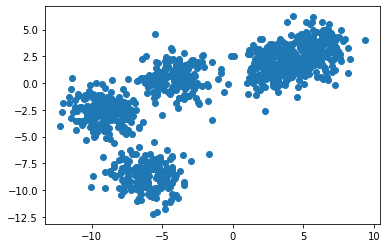

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [17]:
import math
import numpy as np
import operator
def km(Xj,k,e):
  Cj=[] 
  mu=[]
  t=0
  for i in range (k):
    mu.append([0]*1)
  for n in range(k):
    ind=np.random.choice(Xj.shape[0]) #k случайные
    mu[n].append(Xj[ind])
  while True:
    for i in range (k):
     Cj.append([0]*1)

    t+=1  
    J=[]  
    for d in range(Xj.shape[0]):
      dist=[]
      for ii in range(k):
        dist.append(np.power(np.linalg.norm(Xj[d]-mu[ii][t]),2))#объект-центроид
      distance=np.argmin(dist)#к какому кластеру относится точка
      J.append(distance)#сохраняем в общий массив номеров кластеров
      
      Cj[distance].append(Xj[d])#сохраняем точки в кластере
  
    norma1=[]
    for sr in range(k):
      mu[sr].append(1/(len(Cj[sr]))*sum(Cj[sr]))#среднее арифметическое
      norma1.append(np.power(np.linalg.norm(mu[sr][t]-mu[sr][t-1]),2))
   
    #SSE
    sse=0
    norma2=[]
    for i in range(k):
      for cj in range(len(Cj[i])-1):
        norma2.append(np.power(np.linalg.norm(Cj[i][cj]-mu[i][t]),2))
      sse+=sum(norma2)
    #визуализация сходимости
    Cjx=np.zeros((k,Xj.shape[0]))#для хранения координаты x
    Cjy=np.zeros((k,Xj.shape[0]))#для хранения координаты y
    for i in range(k):
     
      for j in range(len(Cj[i])-1):
       
       Cjx[i][j]=Cj[i][j+1][0]
       Cjy[i][j]=Cj[i][j+1][1]
    for klaster in range(k):
      print(t,'итерация')
      plt.scatter(Cjx,Cjy,c='b')#точки кластера
      plt.scatter(mu[klaster][t][0],mu[klaster][t][1],c='r')#центроид
      plt.show()   
    if (sum(norma1)<=e):break;
    else:
      Cj.clear()
      norma1.clear()
      norma2.clear()
      dist.clear()    
      
  return sse,J


1 итерация


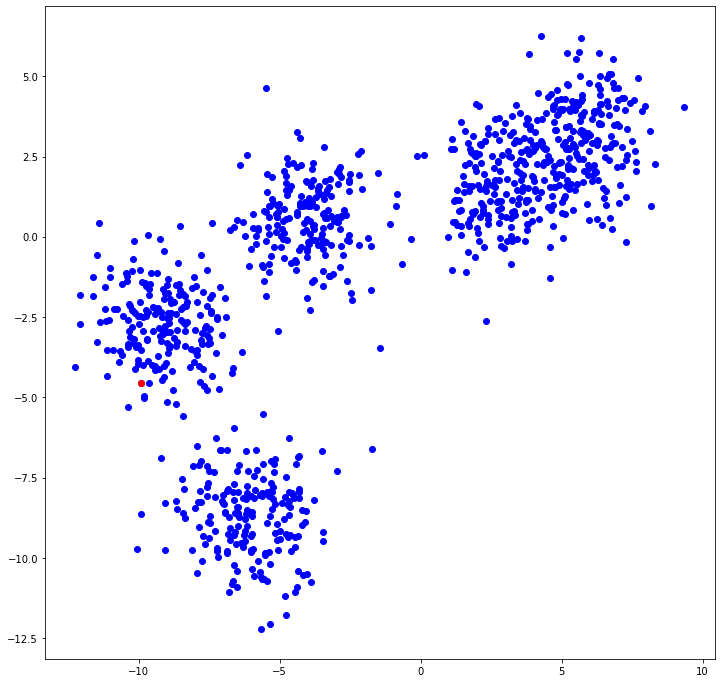

2 итерация


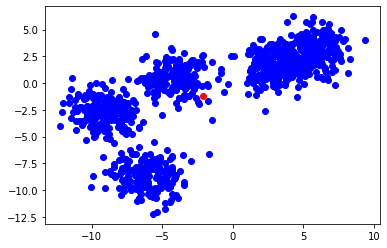

3 итерация


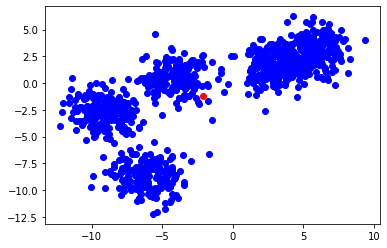

SSE= 51614.105083890834


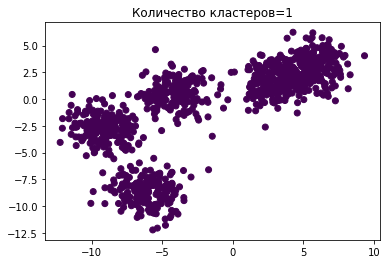

1 итерация


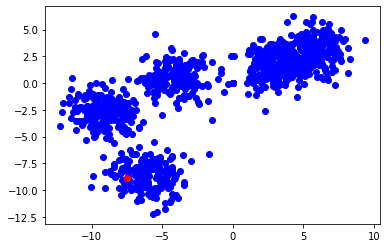

1 итерация


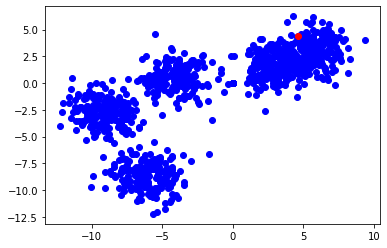

2 итерация


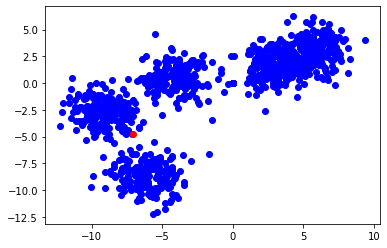

2 итерация


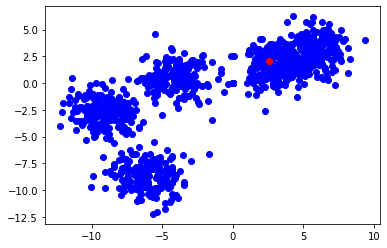

3 итерация


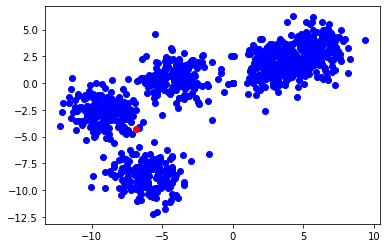

3 итерация


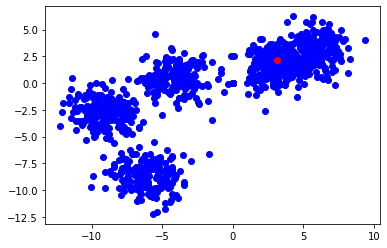

4 итерация


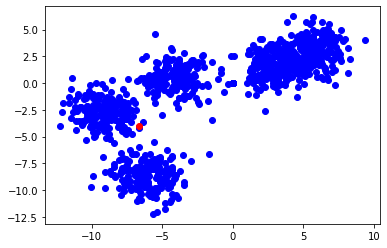

4 итерация


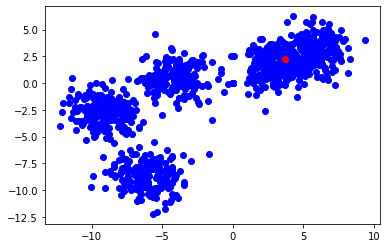

5 итерация


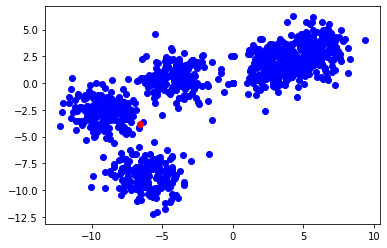

5 итерация


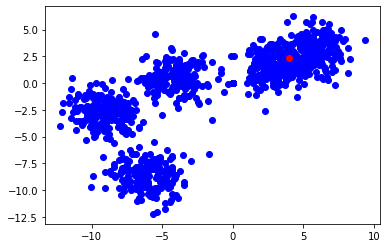

6 итерация


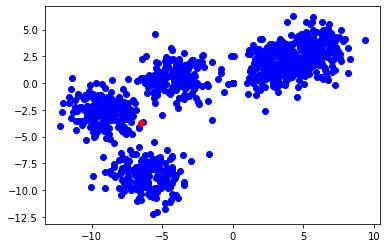

6 итерация


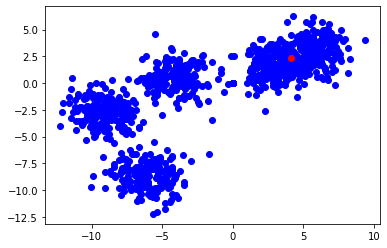

SSE= 27866.53499158667


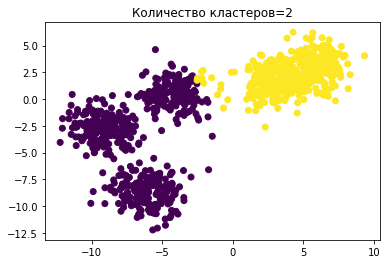

1 итерация


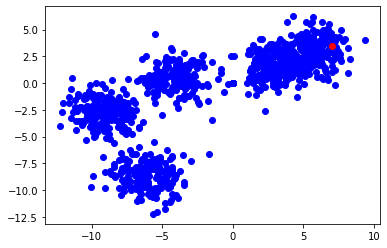

1 итерация


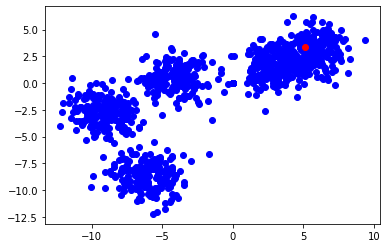

1 итерация


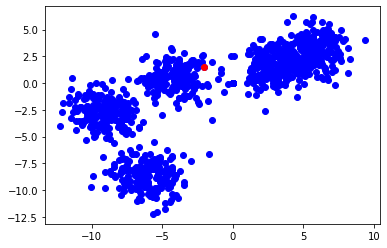

2 итерация


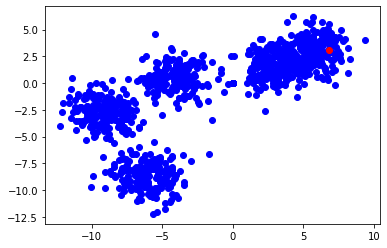

2 итерация


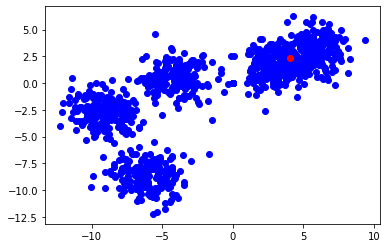

2 итерация


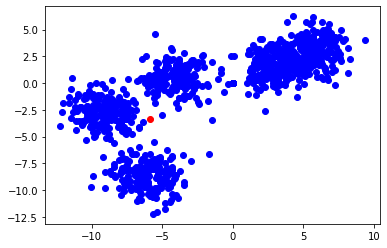

3 итерация


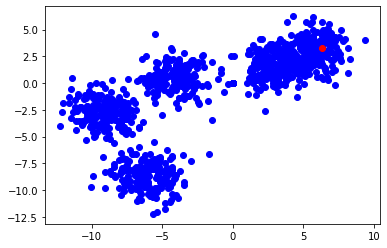

3 итерация


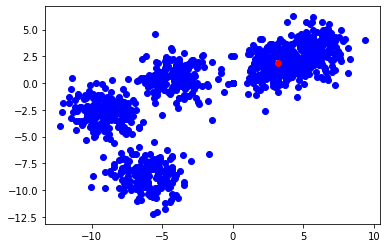

3 итерация


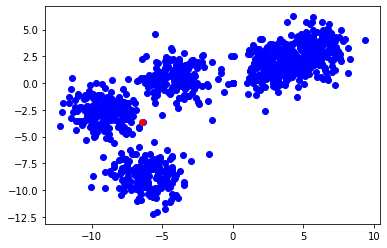

4 итерация


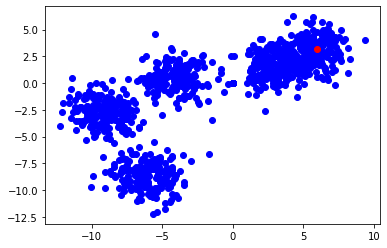

4 итерация


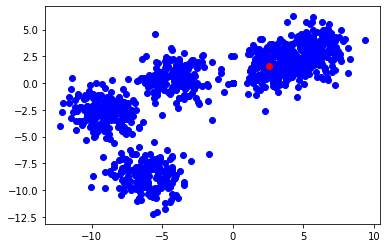

4 итерация


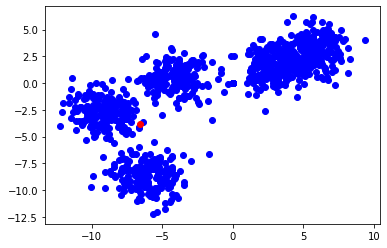

5 итерация


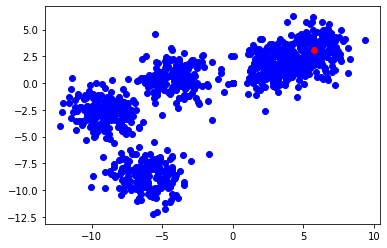

5 итерация


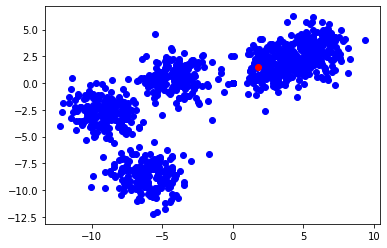

5 итерация


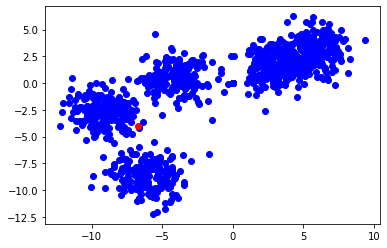

6 итерация


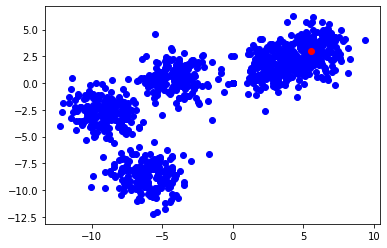

6 итерация


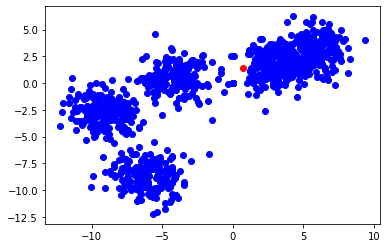

6 итерация


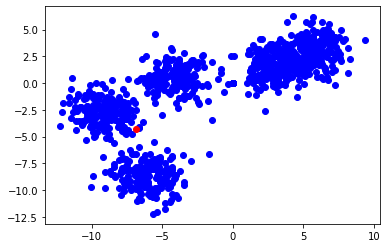

7 итерация


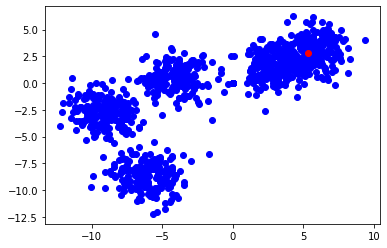

7 итерация


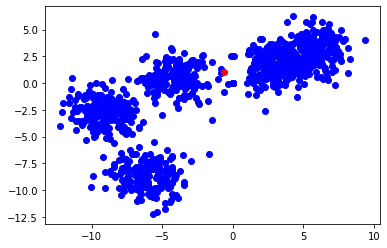

7 итерация


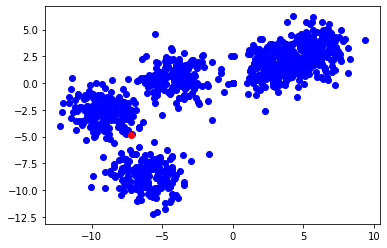

8 итерация


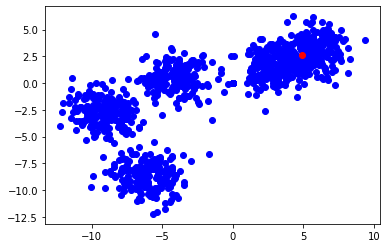

8 итерация


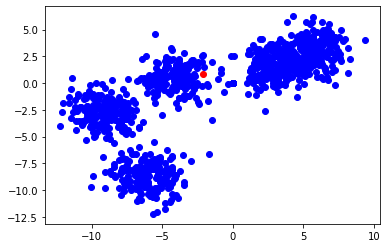

8 итерация


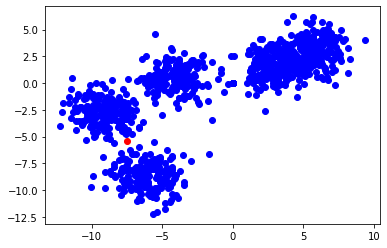

9 итерация


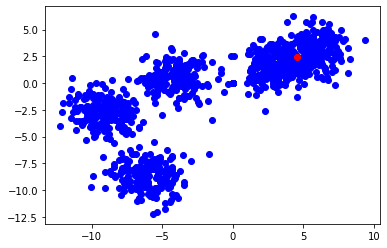

9 итерация


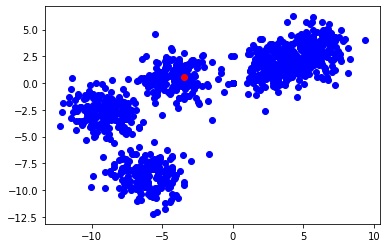

9 итерация


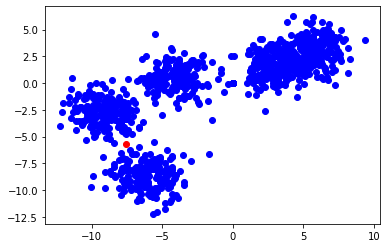

10 итерация


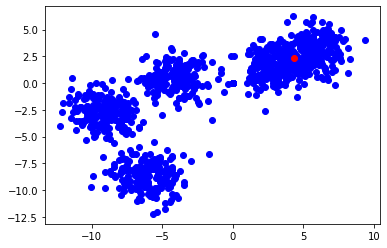

10 итерация


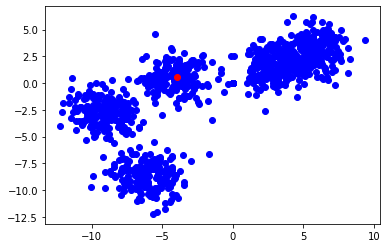

10 итерация


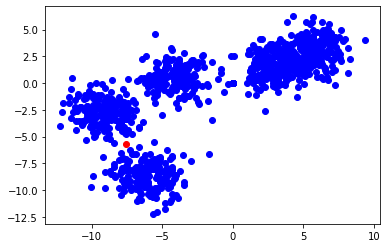

11 итерация


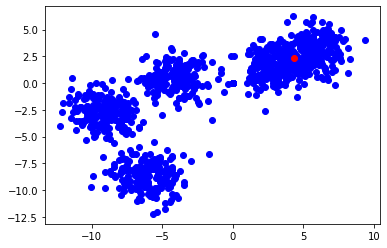

11 итерация


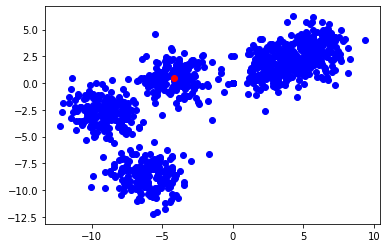

11 итерация


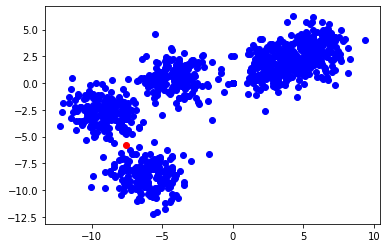

12 итерация


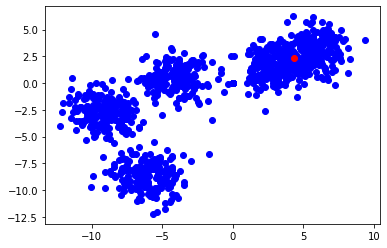

12 итерация


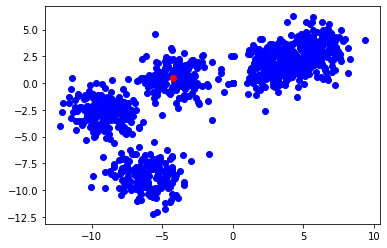

12 итерация


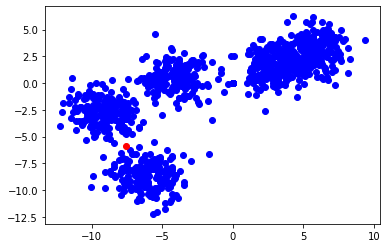

SSE= 13799.914063948498


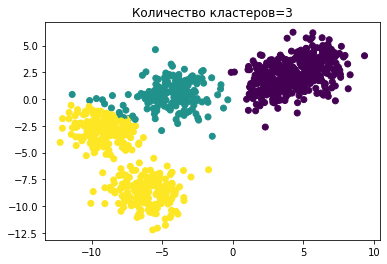

1 итерация


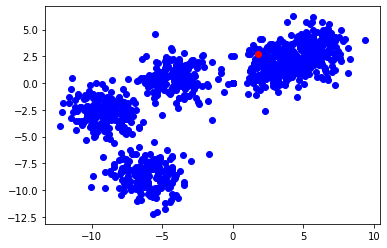

1 итерация


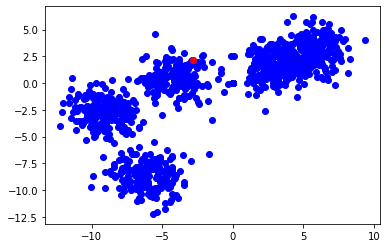

1 итерация


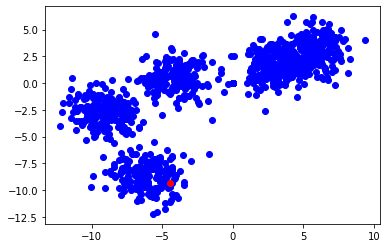

1 итерация


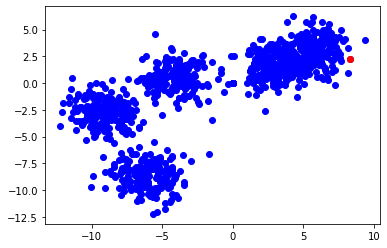

2 итерация


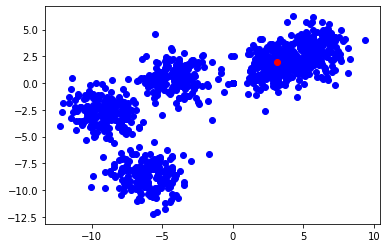

2 итерация


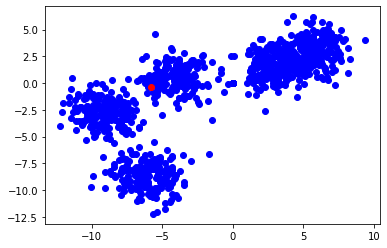

2 итерация


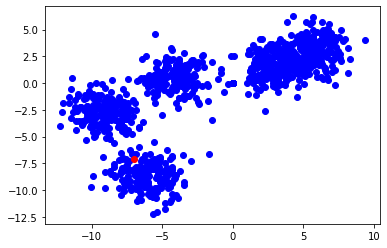

2 итерация


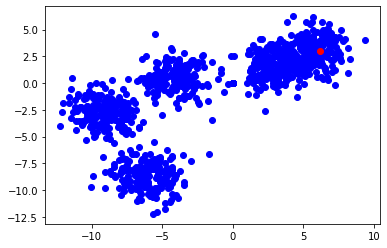

3 итерация


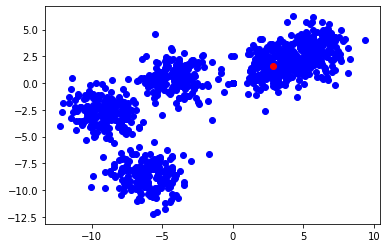

3 итерация


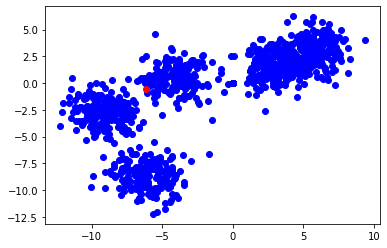

3 итерация


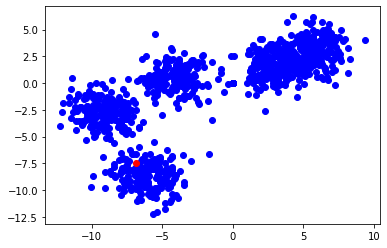

3 итерация


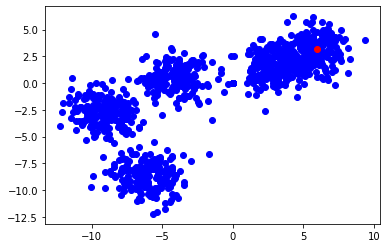

4 итерация


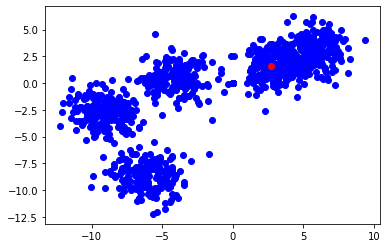

4 итерация


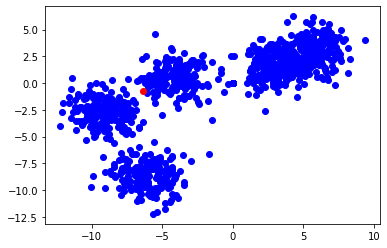

4 итерация


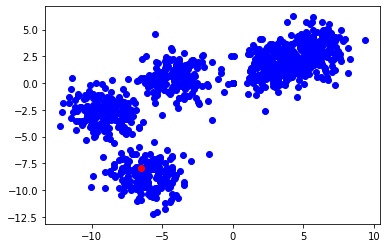

4 итерация


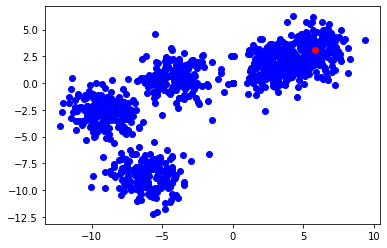

5 итерация


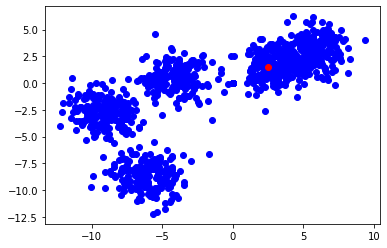

5 итерация


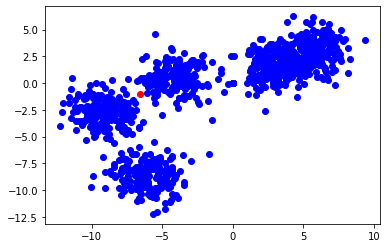

5 итерация


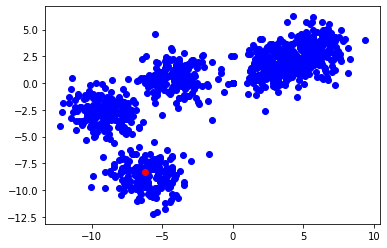

5 итерация


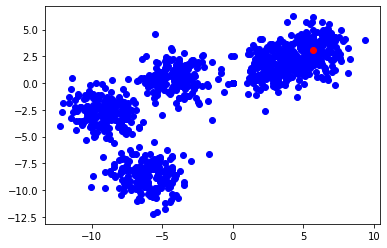

6 итерация


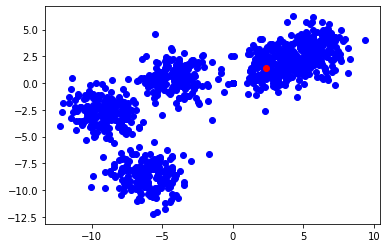

6 итерация


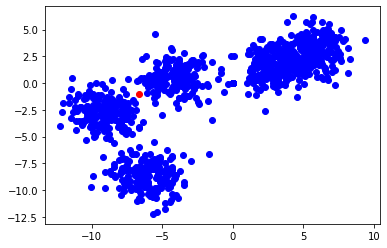

6 итерация


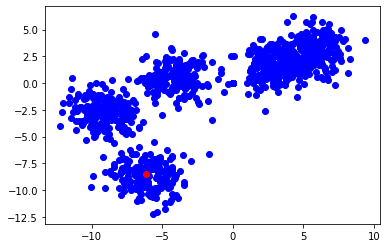

6 итерация


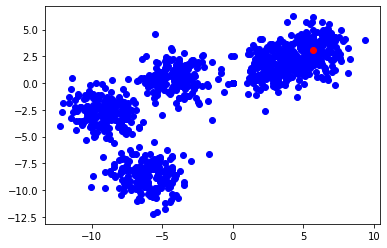

7 итерация


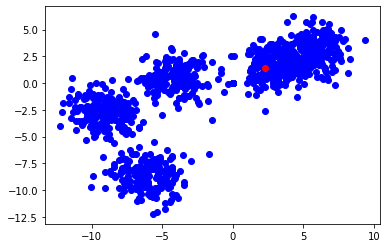

7 итерация


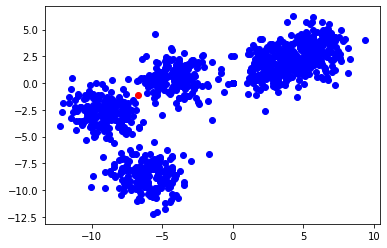

7 итерация


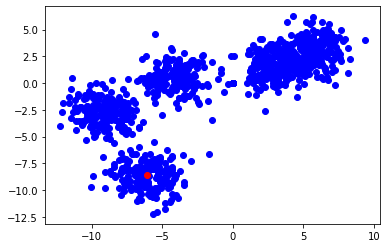

7 итерация


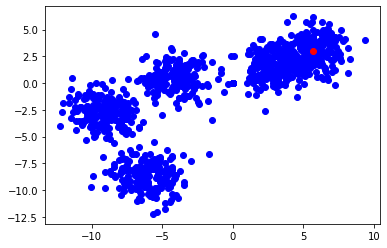

SSE= 18010.675002149717


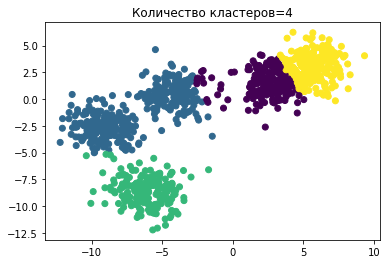

1 итерация


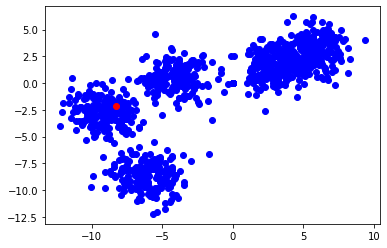

1 итерация


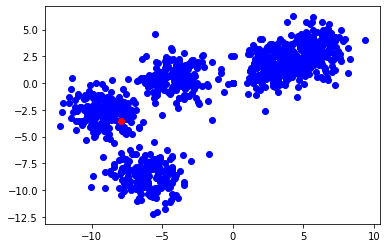

1 итерация


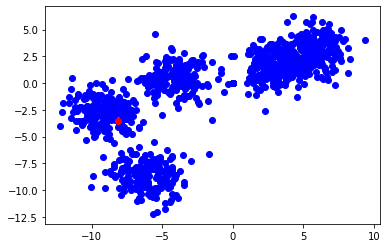

1 итерация


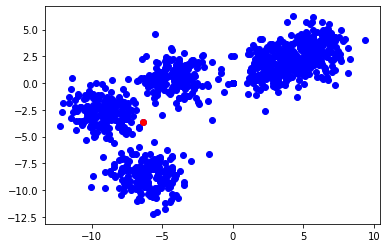

1 итерация


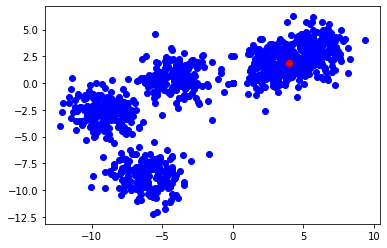

2 итерация


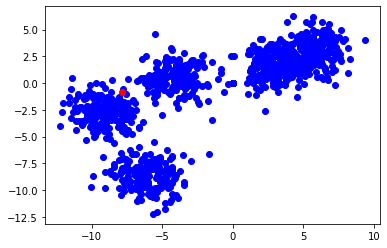

2 итерация


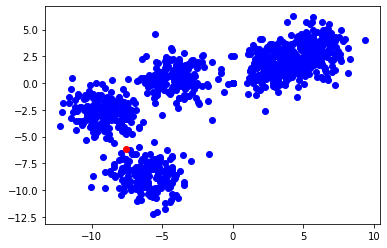

2 итерация


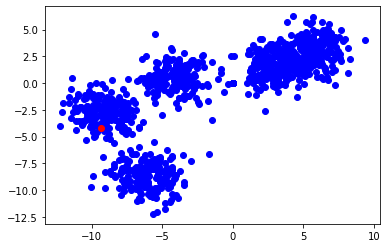

2 итерация


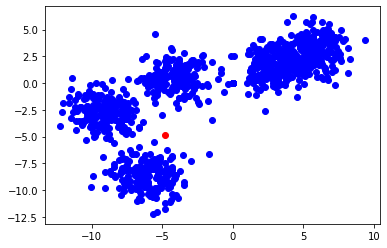

2 итерация


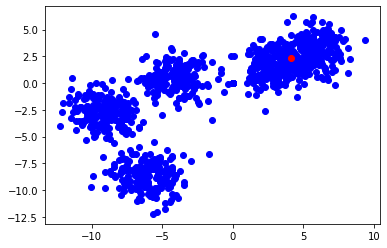

3 итерация


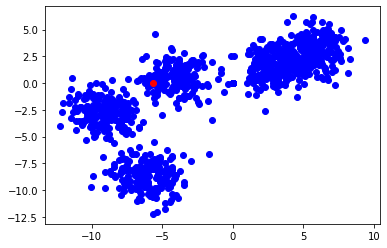

3 итерация


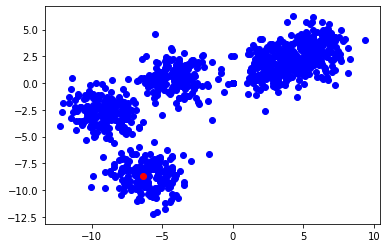

3 итерация


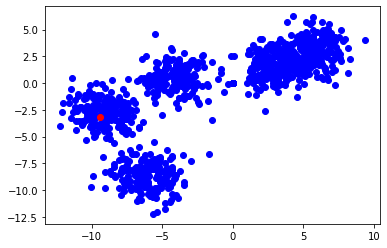

3 итерация


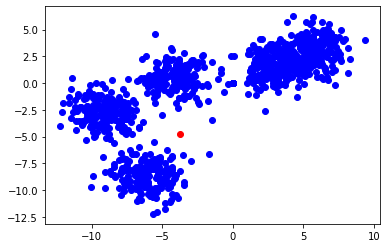

3 итерация


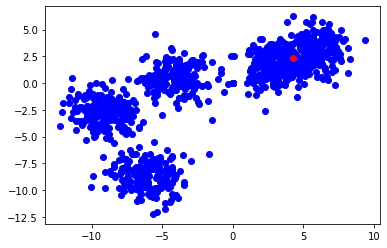

4 итерация


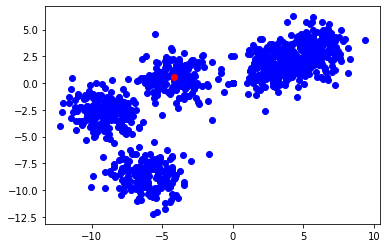

4 итерация


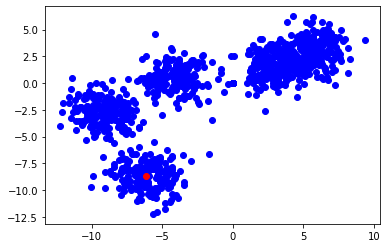

4 итерация


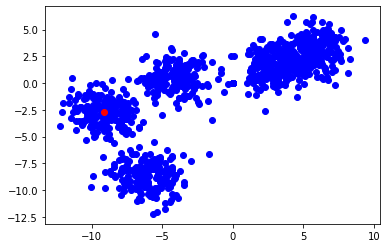

4 итерация


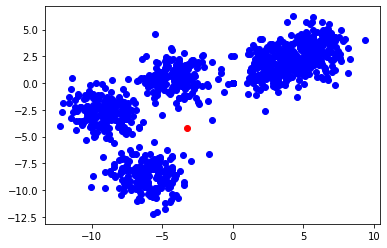

4 итерация


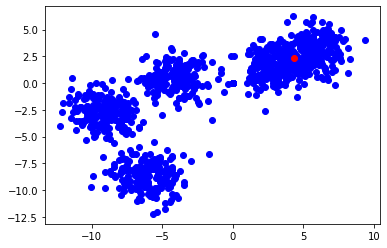

5 итерация


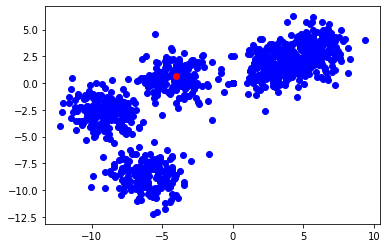

5 итерация


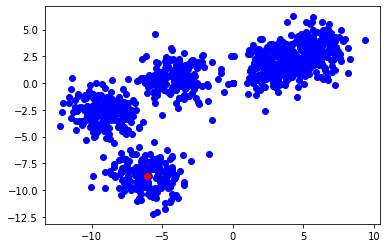

5 итерация


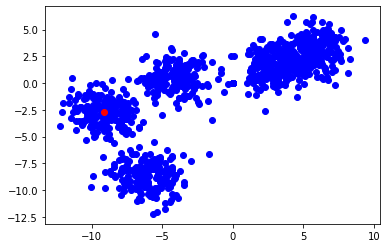

5 итерация


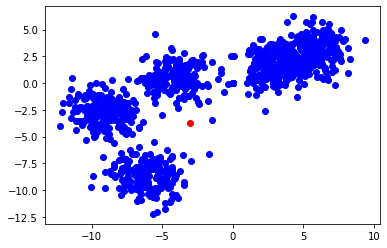

5 итерация


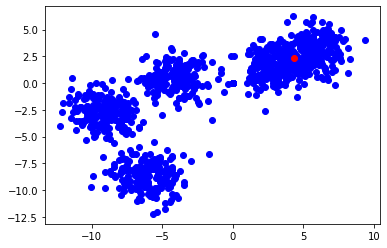

6 итерация


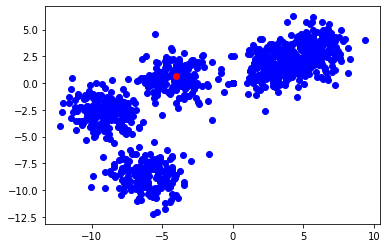

6 итерация


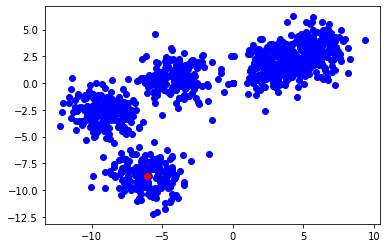

6 итерация


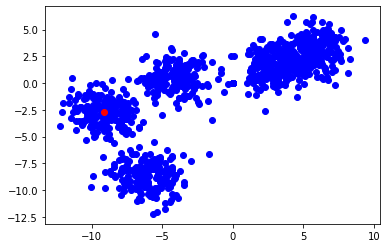

6 итерация


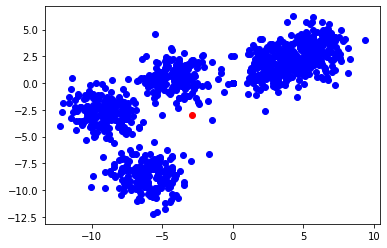

6 итерация


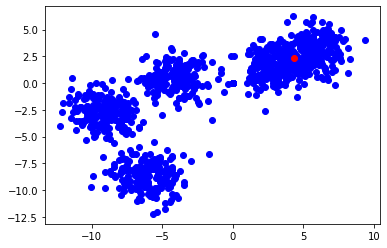

7 итерация


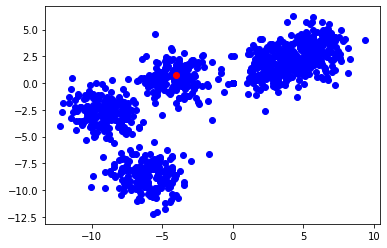

7 итерация


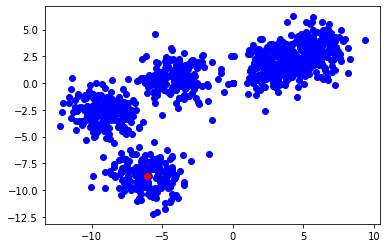

7 итерация


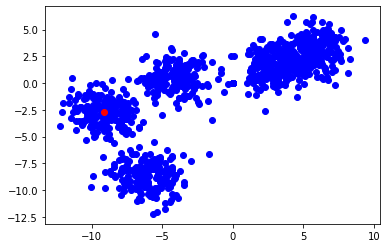

7 итерация


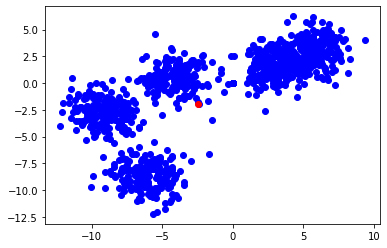

7 итерация


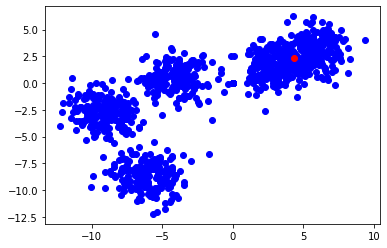

8 итерация


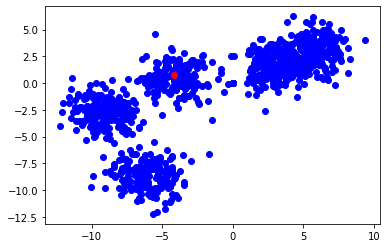

8 итерация


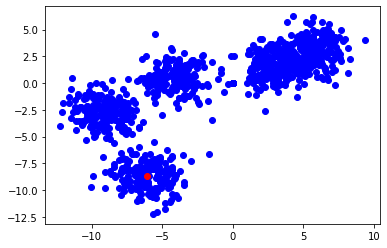

8 итерация


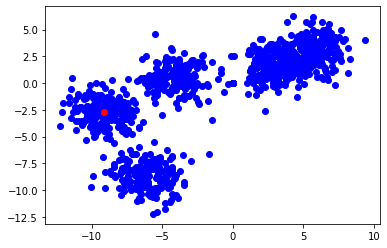

8 итерация


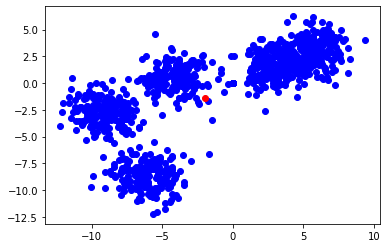

8 итерация


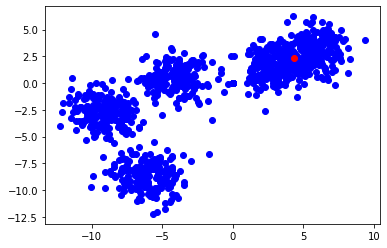

9 итерация


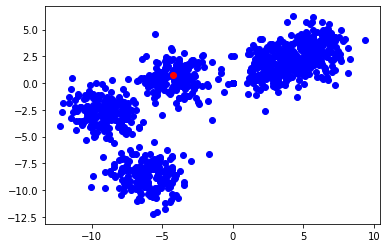

9 итерация


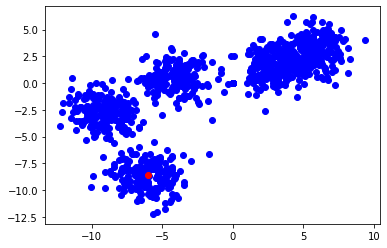

9 итерация


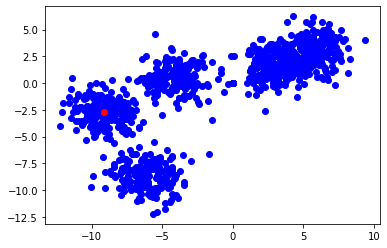

9 итерация


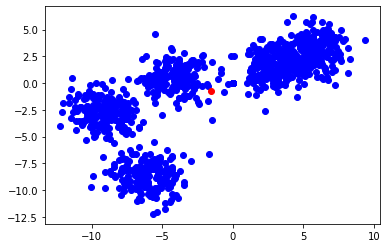

9 итерация


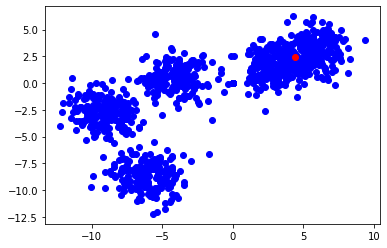

10 итерация


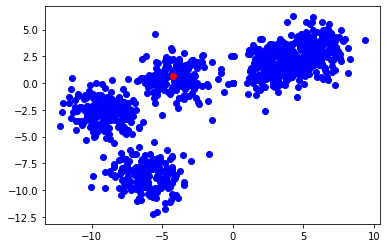

10 итерация


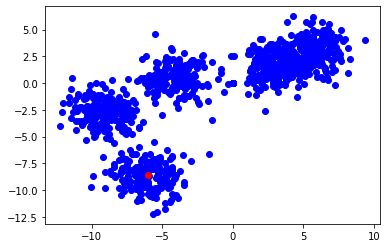

10 итерация


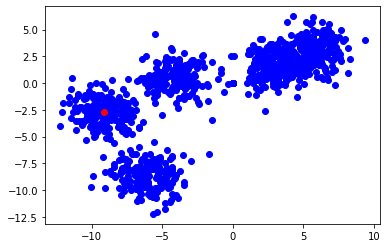

10 итерация


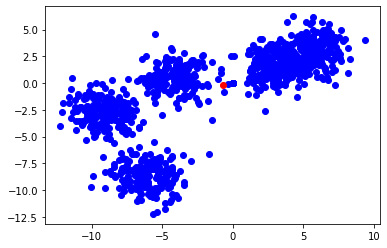

10 итерация


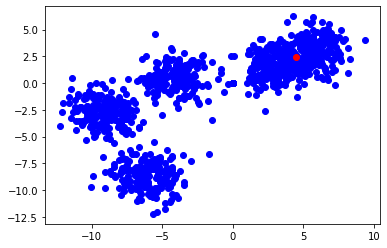

11 итерация


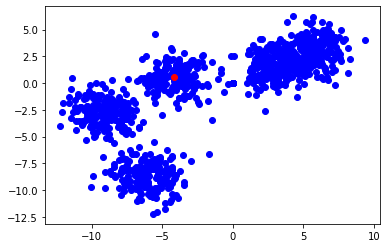

11 итерация


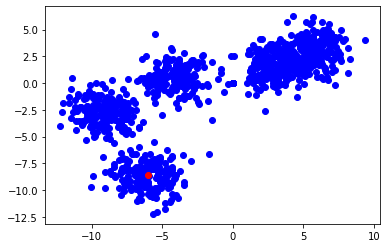

11 итерация


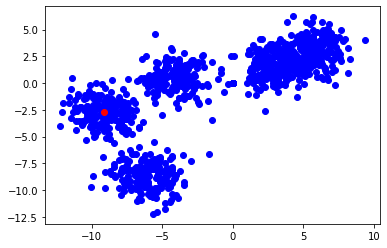

11 итерация


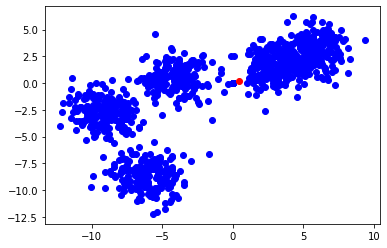

11 итерация


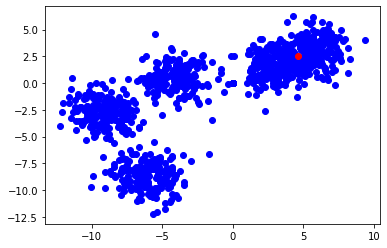

12 итерация


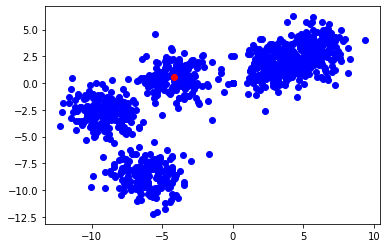

12 итерация


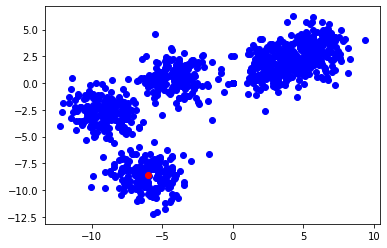

12 итерация


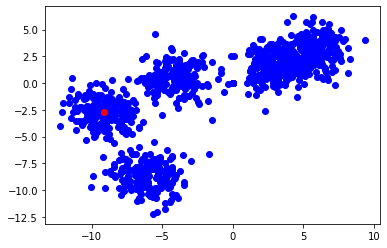

12 итерация


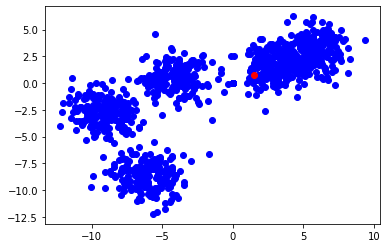

12 итерация


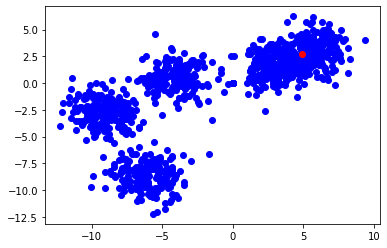

13 итерация


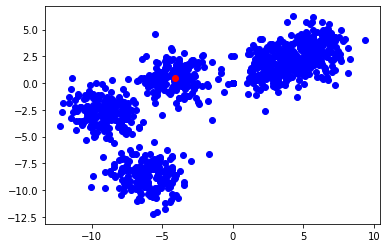

13 итерация


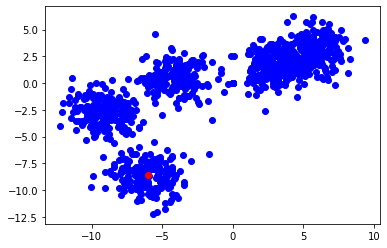

13 итерация


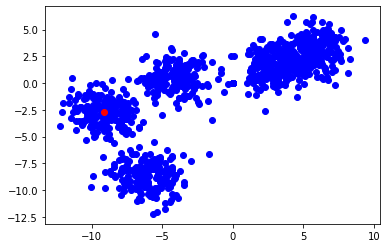

13 итерация


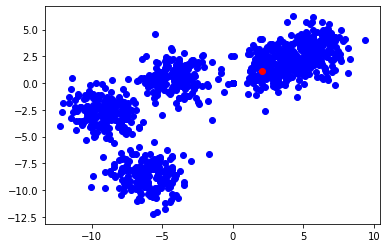

13 итерация


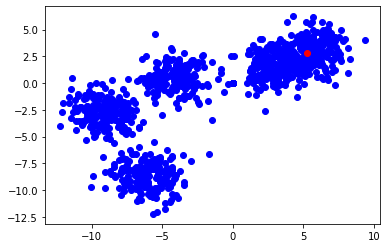

14 итерация


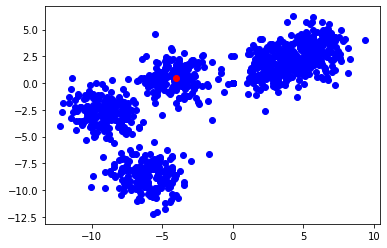

14 итерация


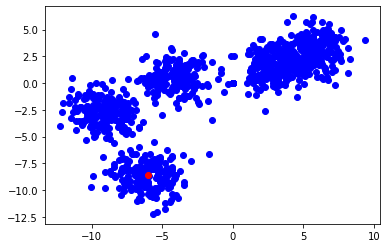

14 итерация


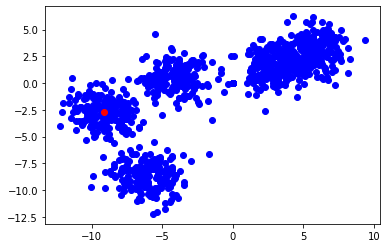

14 итерация


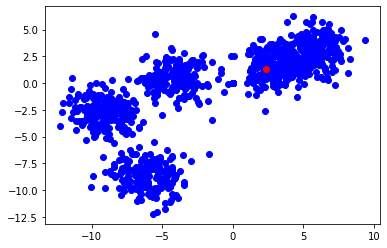

14 итерация


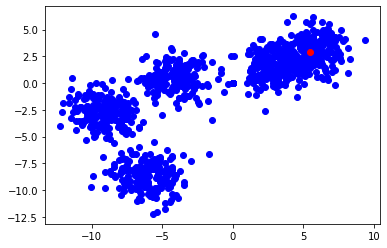

15 итерация


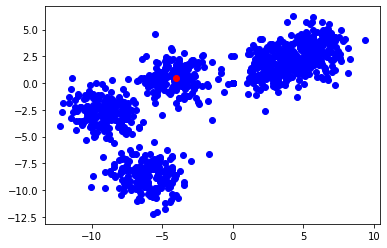

15 итерация


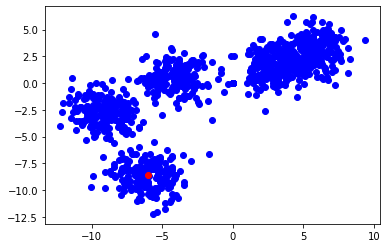

15 итерация


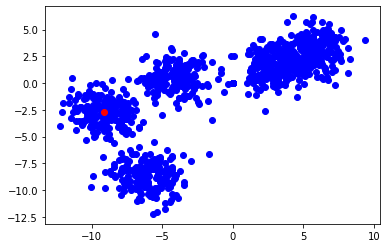

15 итерация


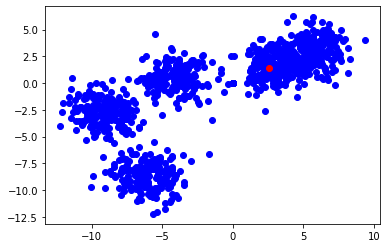

15 итерация


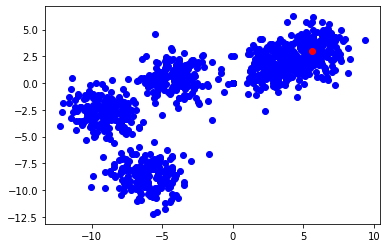

16 итерация


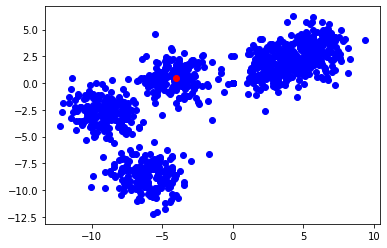

16 итерация


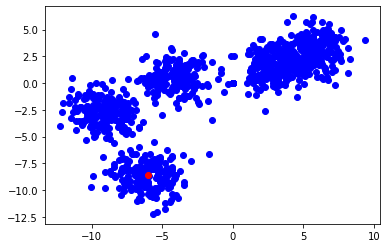

16 итерация


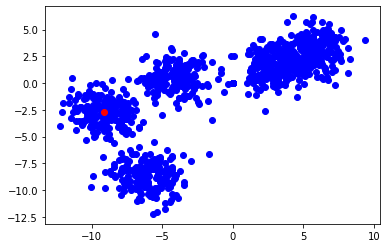

16 итерация


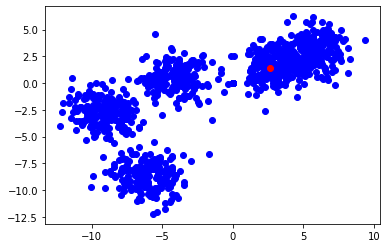

16 итерация


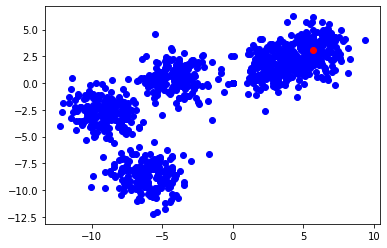

SSE= 9446.435572527042


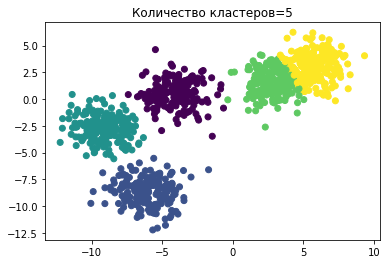

1 итерация


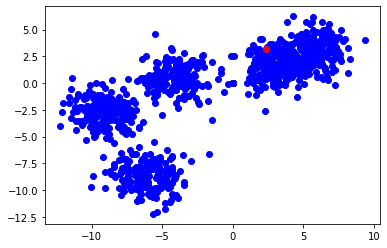

1 итерация


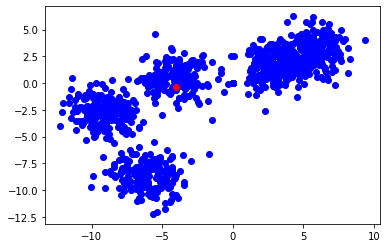

1 итерация


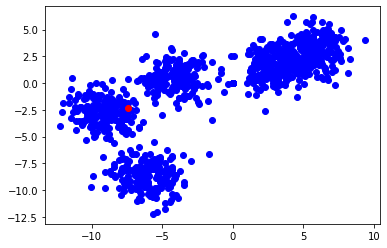

1 итерация


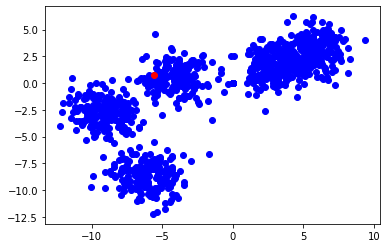

1 итерация


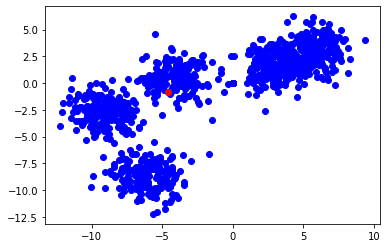

1 итерация


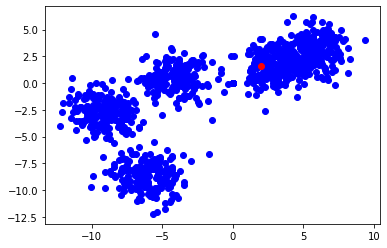

2 итерация


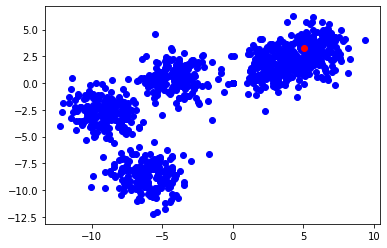

2 итерация


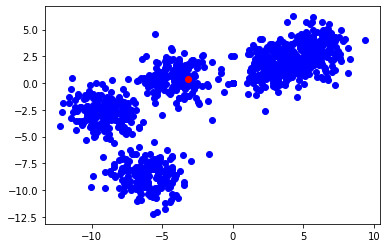

2 итерация


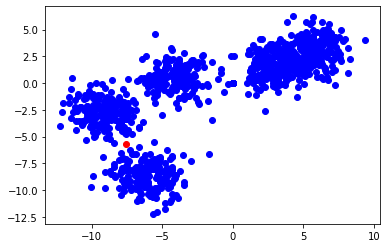

2 итерация


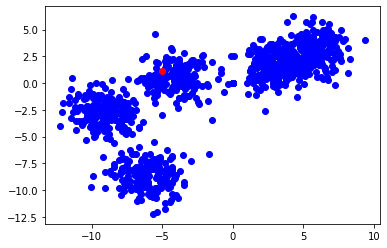

2 итерация


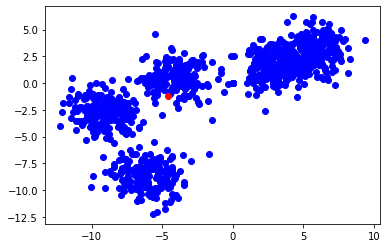

2 итерация


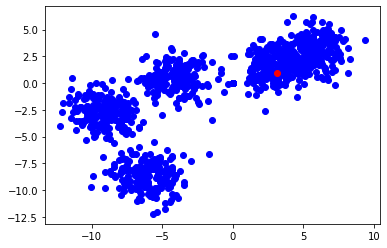

3 итерация


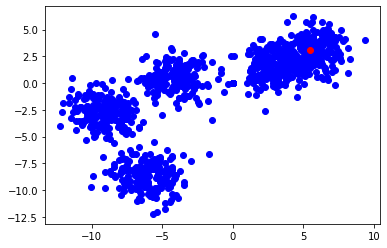

3 итерация


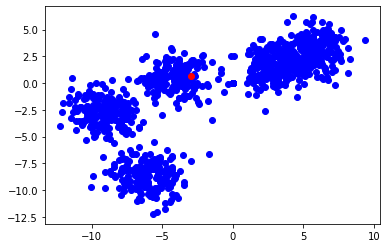

3 итерация


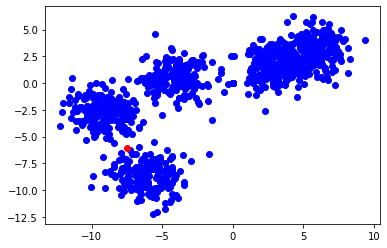

3 итерация


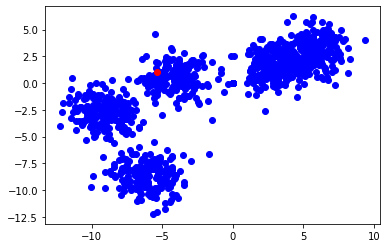

3 итерация


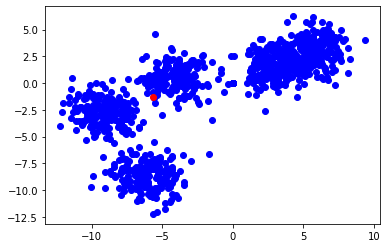

3 итерация


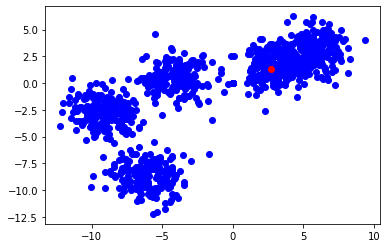

4 итерация


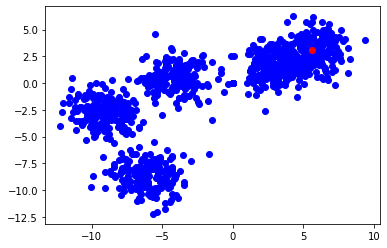

4 итерация


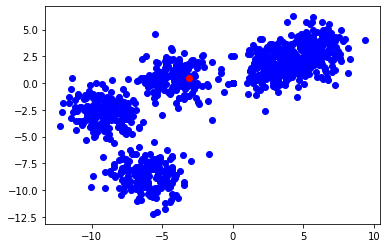

4 итерация


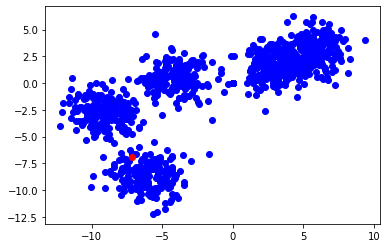

4 итерация


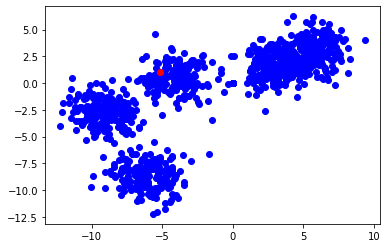

4 итерация


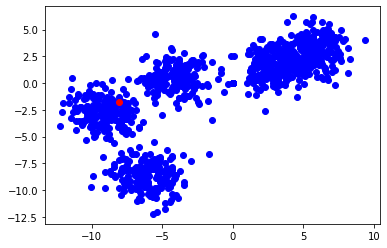

4 итерация


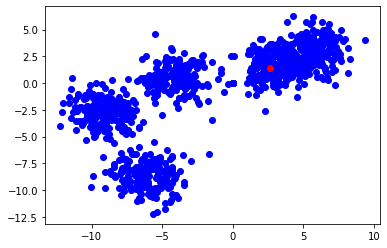

5 итерация


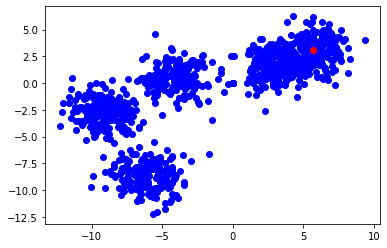

5 итерация


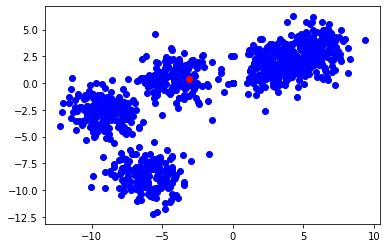

5 итерация


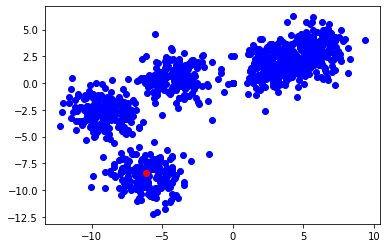

5 итерация


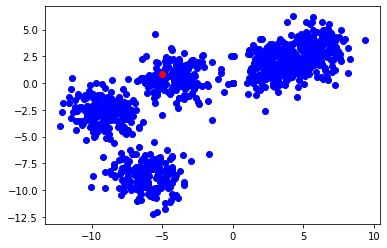

5 итерация


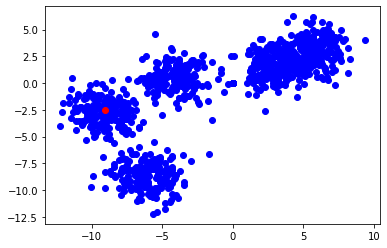

5 итерация


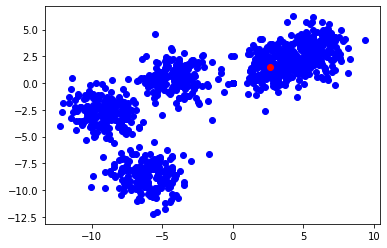

6 итерация


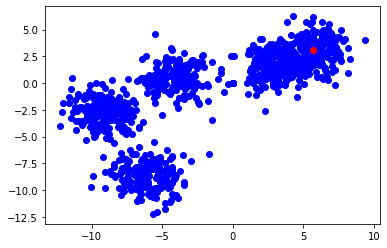

6 итерация


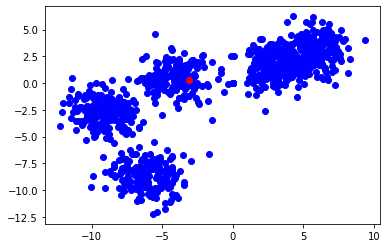

6 итерация


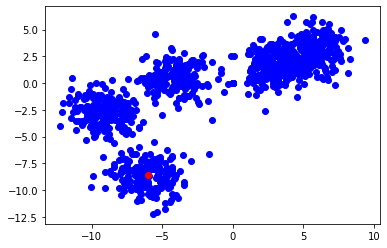

6 итерация


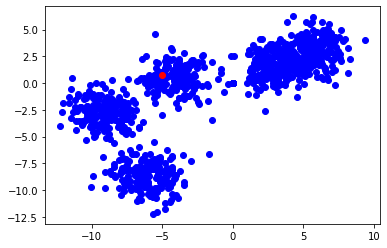

6 итерация


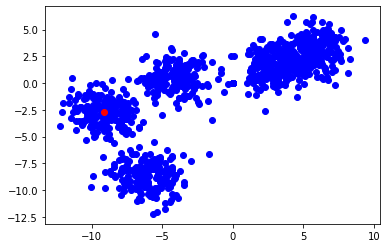

6 итерация


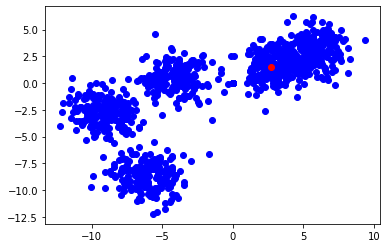

7 итерация


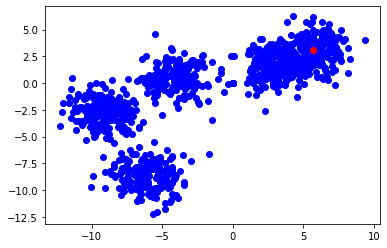

7 итерация


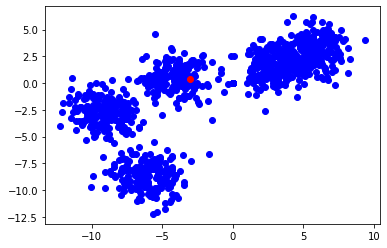

7 итерация


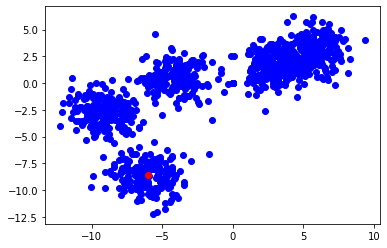

7 итерация


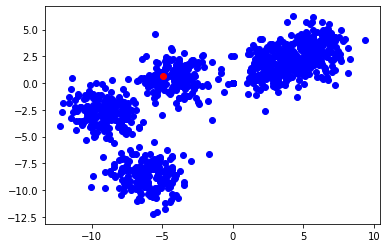

7 итерация


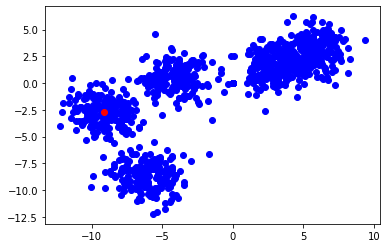

7 итерация


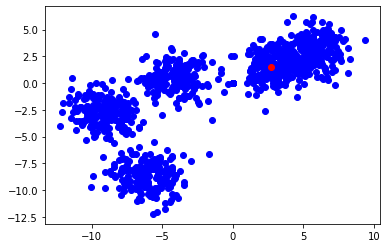

SSE= 10137.96392884182


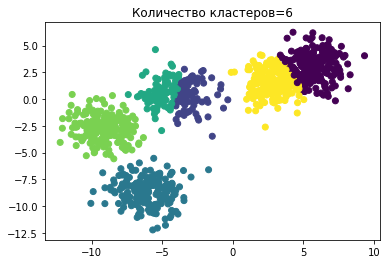

1 итерация


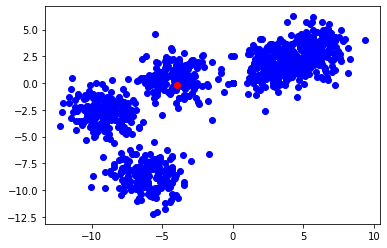

1 итерация


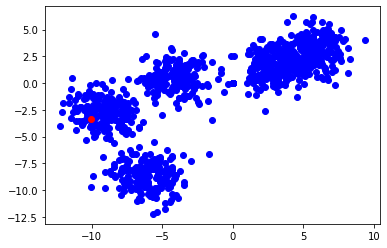

1 итерация


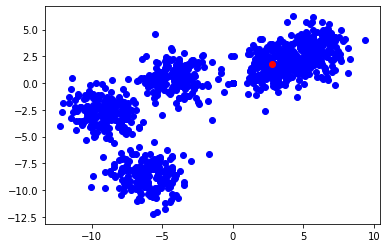

1 итерация


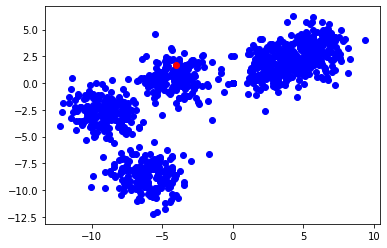

1 итерация


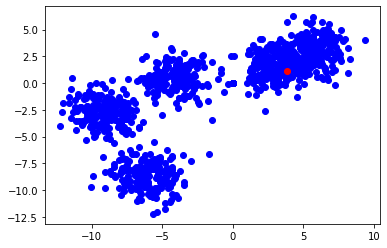

1 итерация


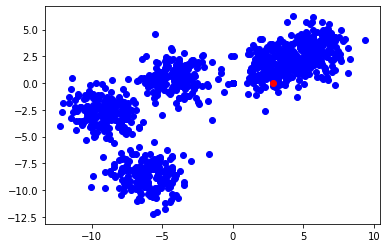

1 итерация


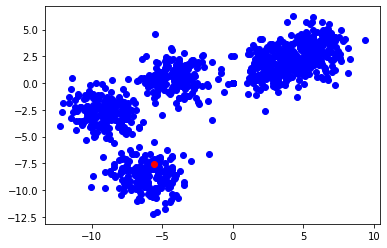

2 итерация


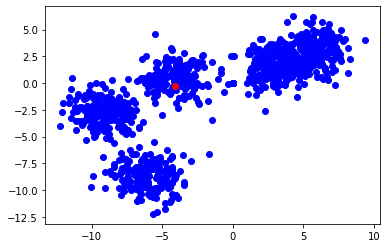

2 итерация


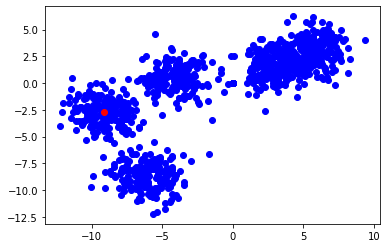

2 итерация


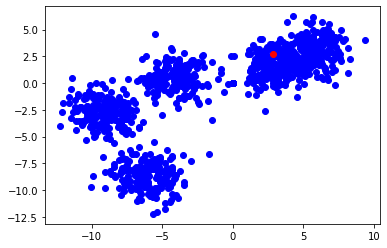

2 итерация


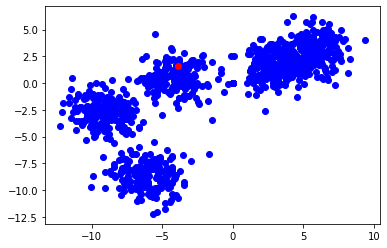

2 итерация


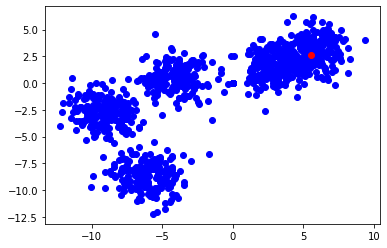

2 итерация


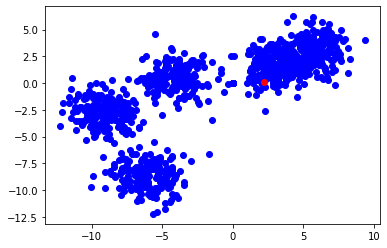

2 итерация


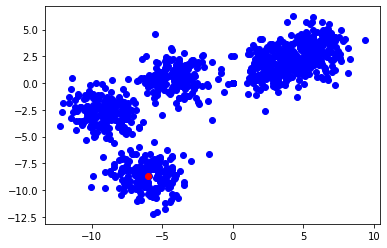

3 итерация


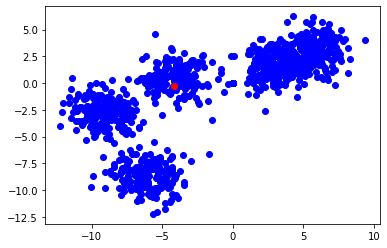

3 итерация


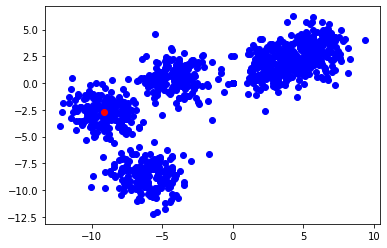

3 итерация


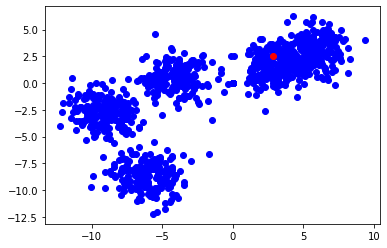

3 итерация


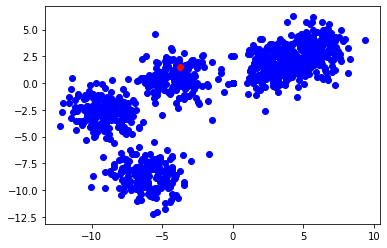

3 итерация


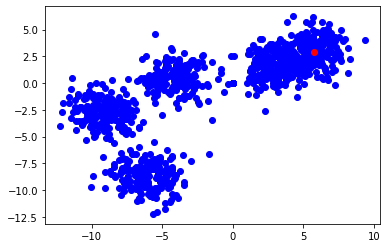

3 итерация


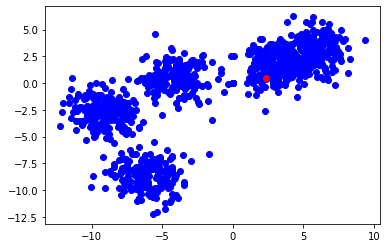

3 итерация


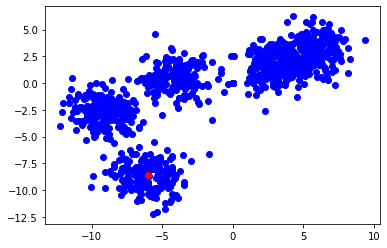

4 итерация


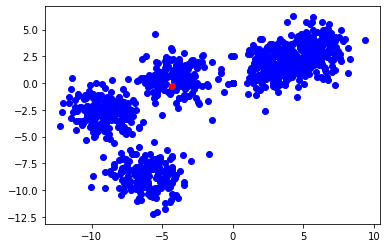

4 итерация


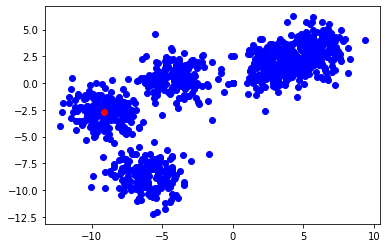

4 итерация


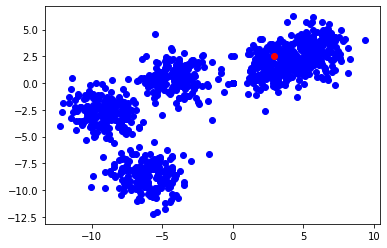

4 итерация


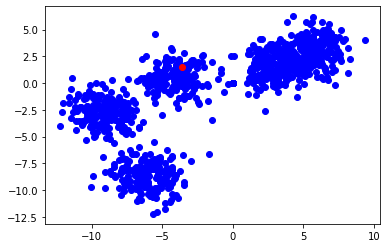

4 итерация


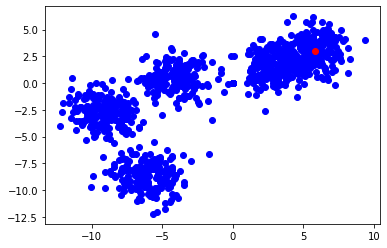

4 итерация


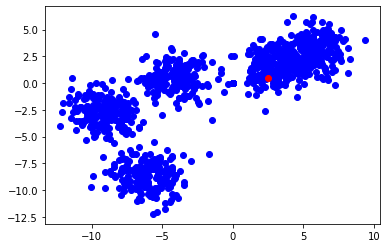

4 итерация


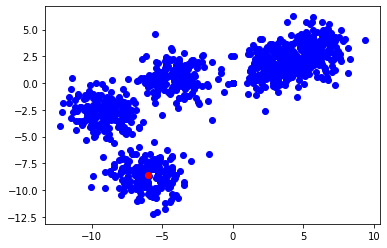

5 итерация


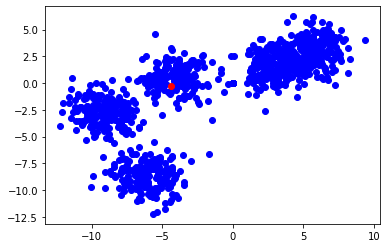

5 итерация


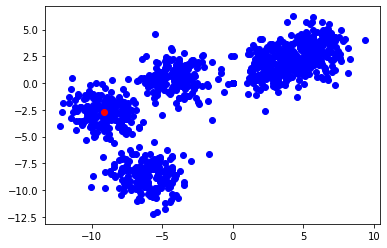

5 итерация


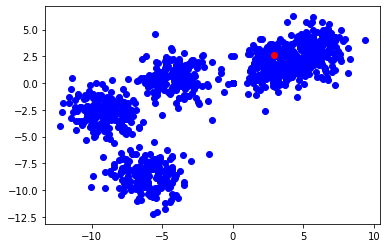

5 итерация


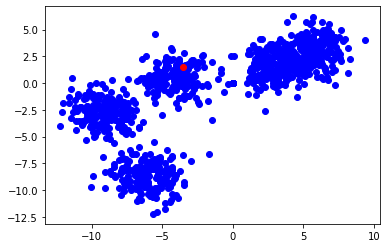

5 итерация


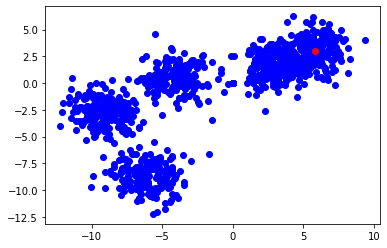

5 итерация


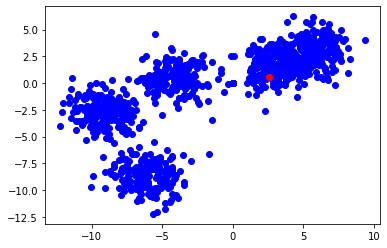

5 итерация


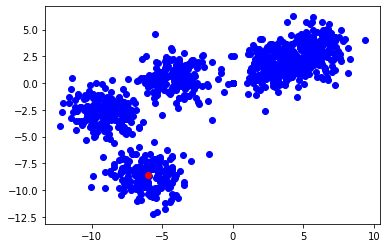

SSE= 9832.307401840617


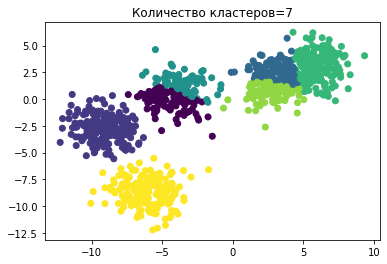

1 итерация


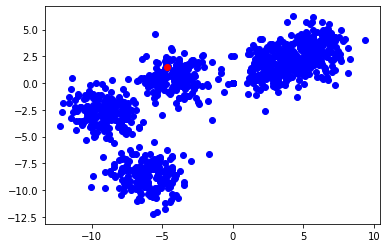

1 итерация


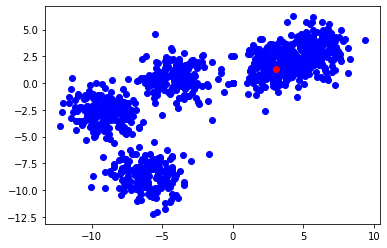

1 итерация


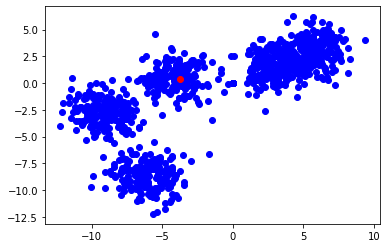

1 итерация


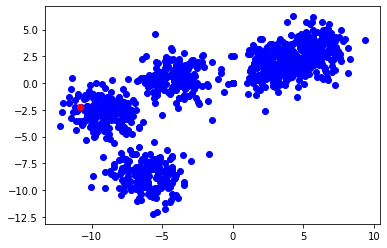

1 итерация


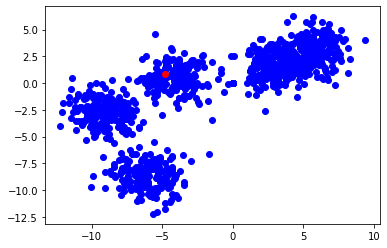

1 итерация


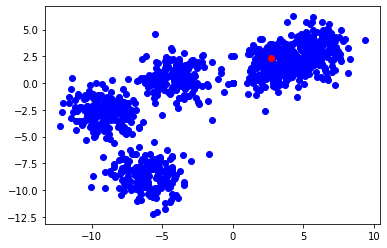

1 итерация


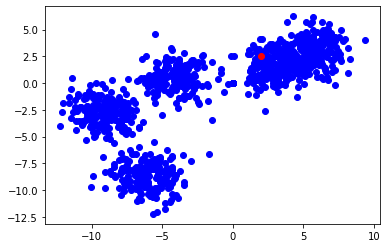

1 итерация


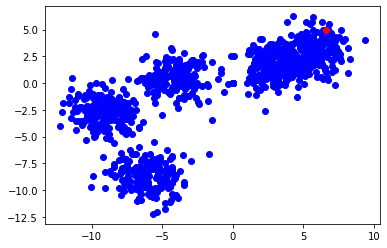

2 итерация


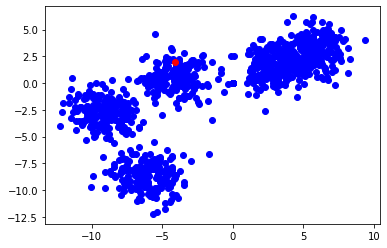

2 итерация


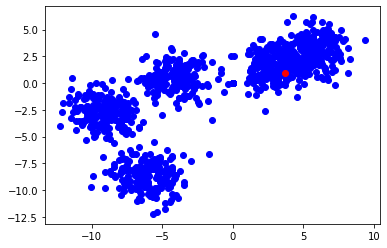

2 итерация


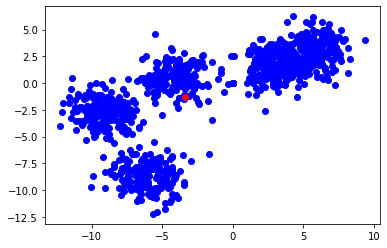

2 итерация


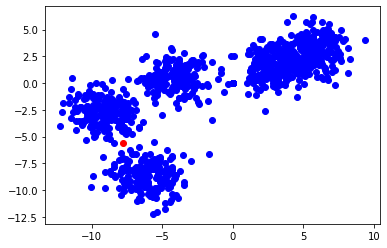

2 итерация


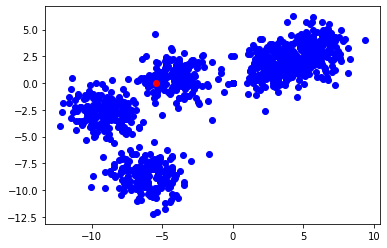

2 итерация


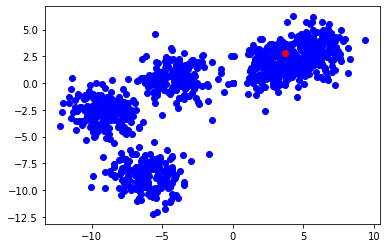

2 итерация


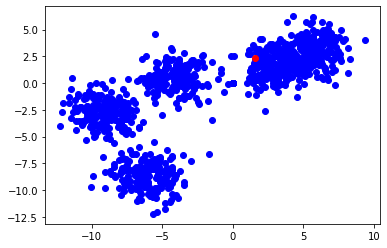

2 итерация


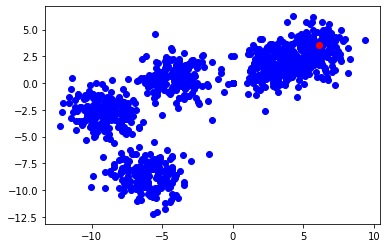

3 итерация


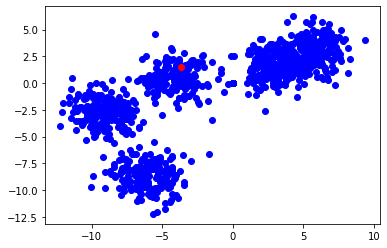

3 итерация


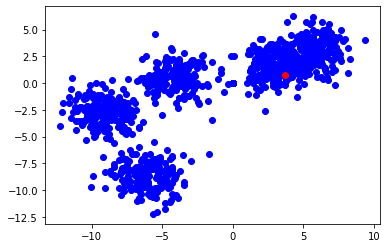

3 итерация


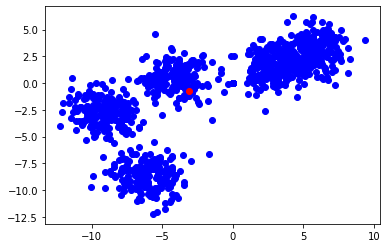

3 итерация


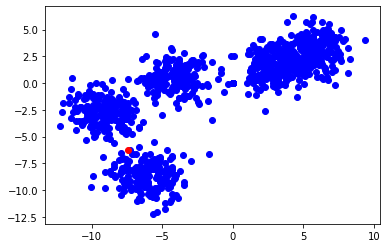

3 итерация


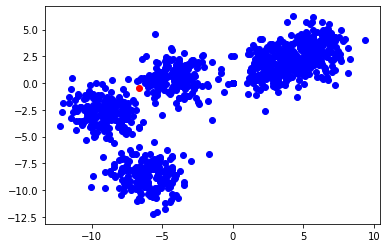

3 итерация


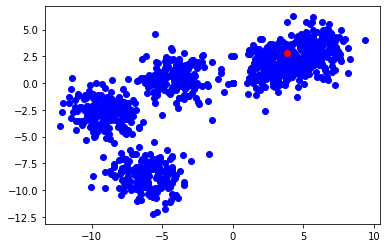

3 итерация


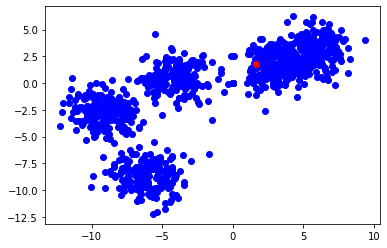

3 итерация


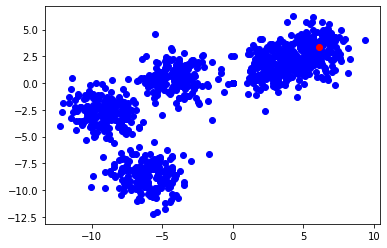

4 итерация


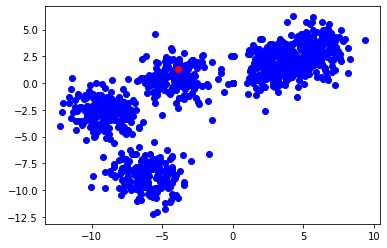

4 итерация


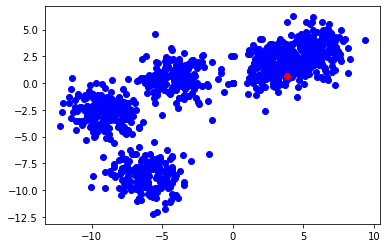

4 итерация


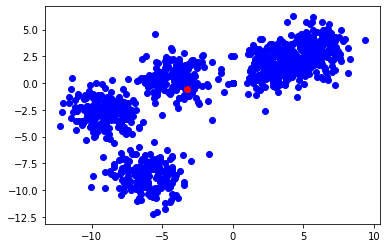

4 итерация


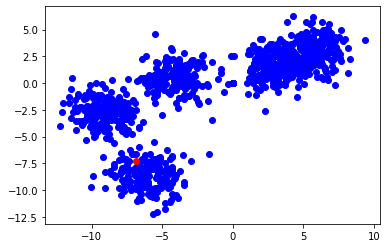

4 итерация


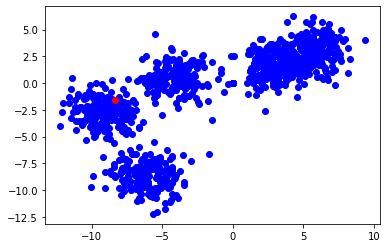

4 итерация


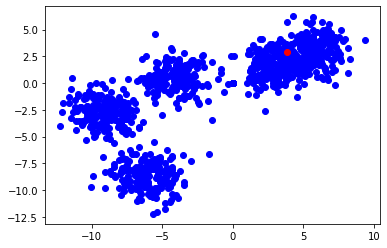

4 итерация


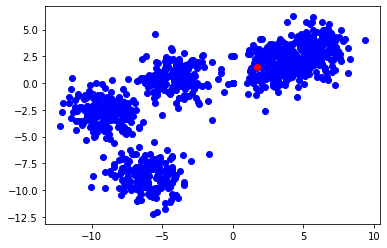

4 итерация


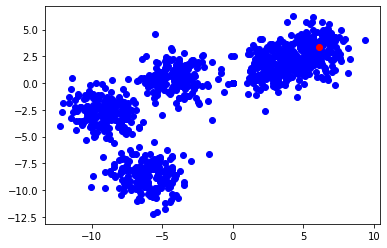

5 итерация


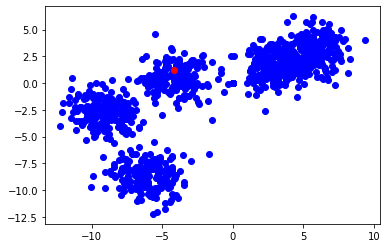

5 итерация


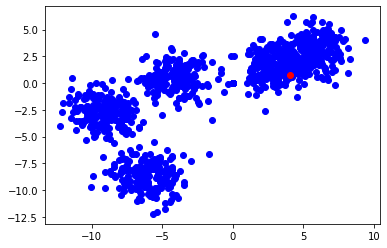

5 итерация


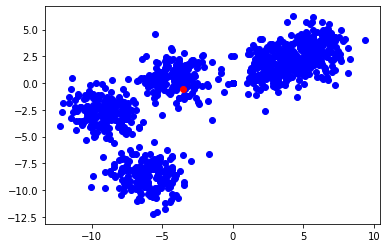

5 итерация


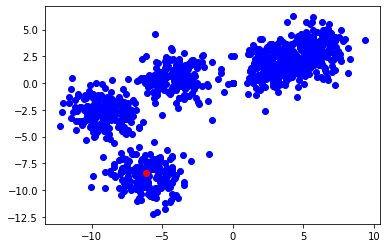

5 итерация


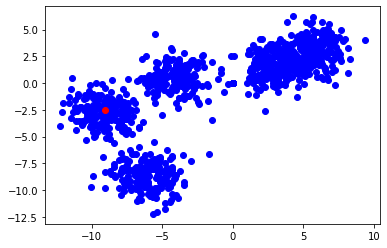

5 итерация


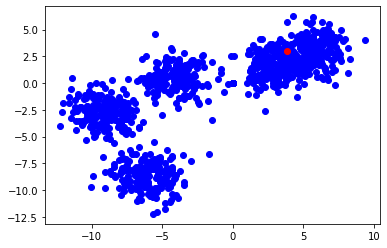

5 итерация


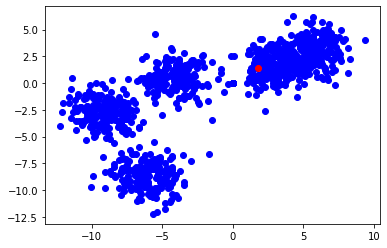

5 итерация


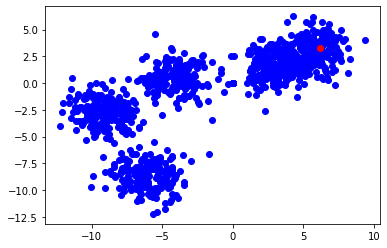

6 итерация


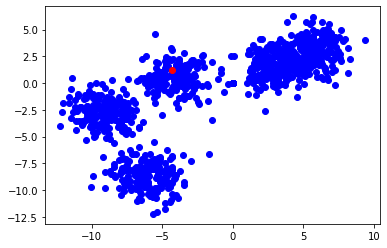

6 итерация


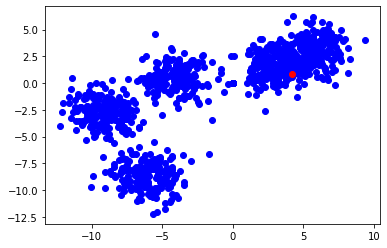

6 итерация


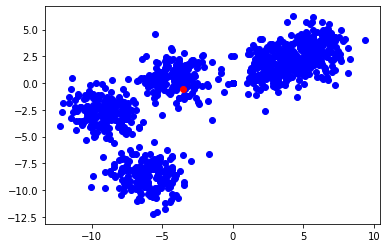

6 итерация


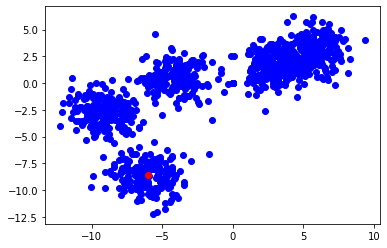

6 итерация


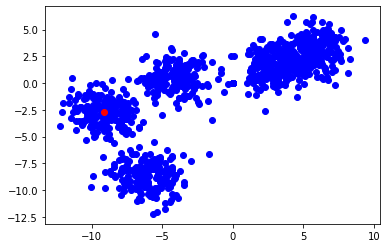

6 итерация


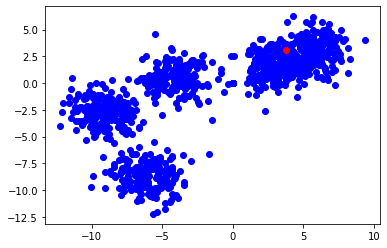

6 итерация


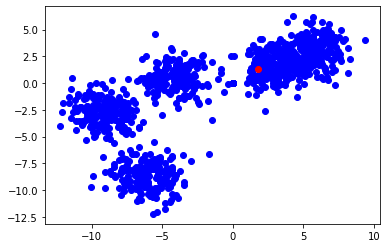

6 итерация


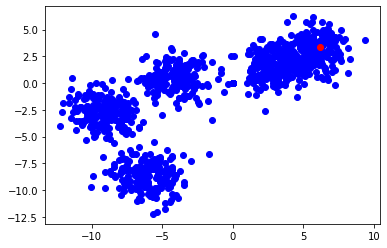

7 итерация


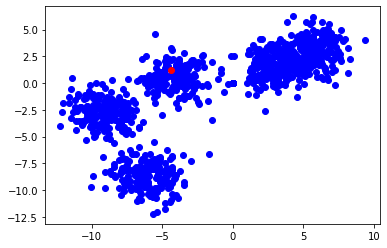

7 итерация


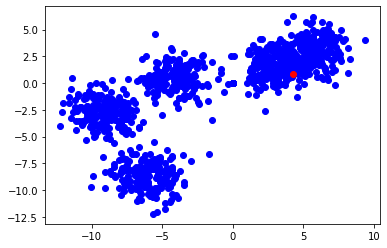

7 итерация


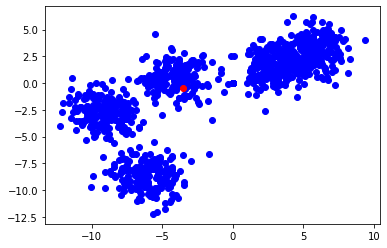

7 итерация


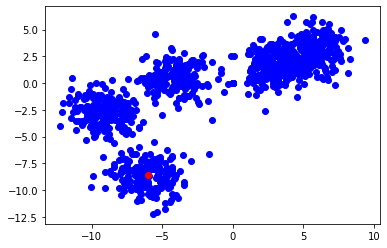

7 итерация


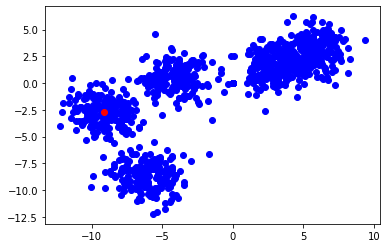

7 итерация


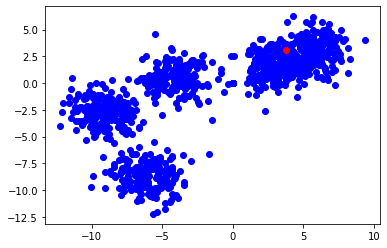

7 итерация


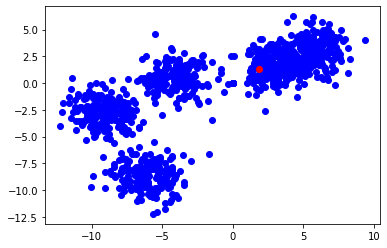

7 итерация


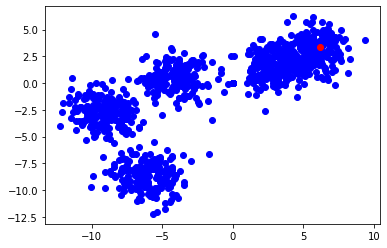

SSE= 11409.43735791236


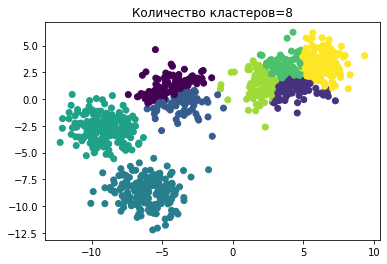

1 итерация


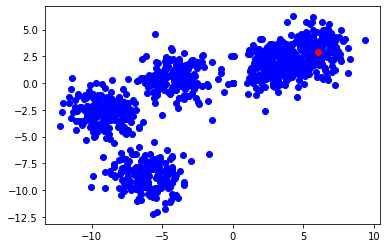

1 итерация


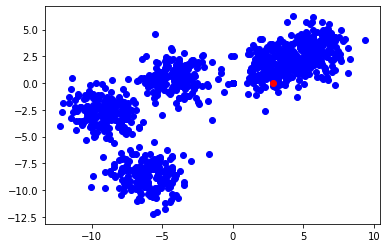

1 итерация


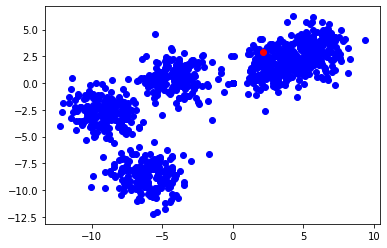

1 итерация


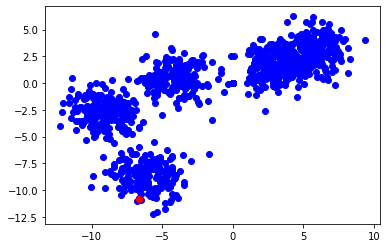

1 итерация


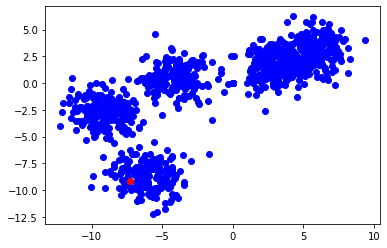

1 итерация


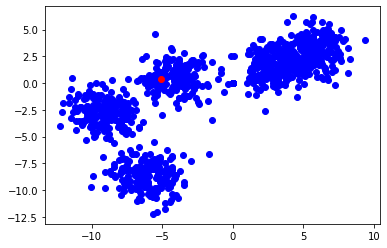

1 итерация


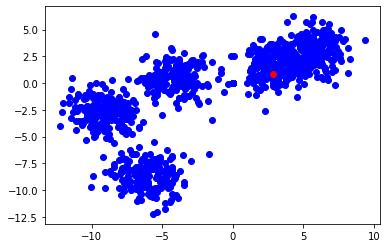

1 итерация


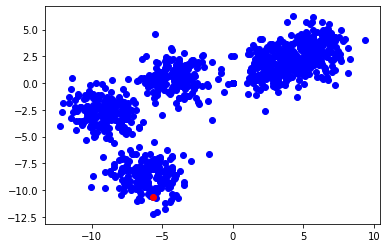

1 итерация


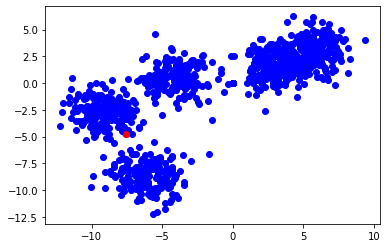

2 итерация


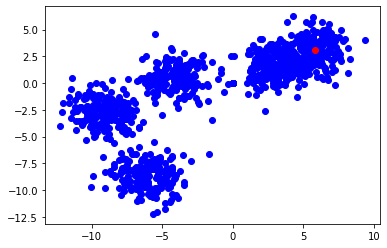

2 итерация


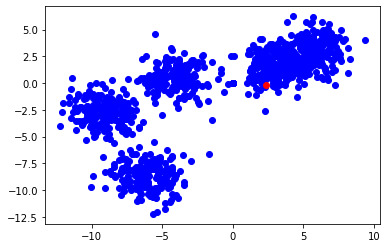

2 итерация


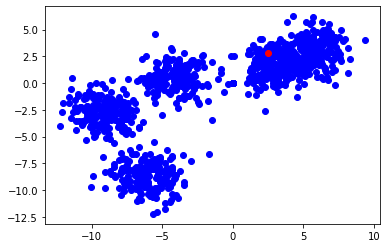

2 итерация


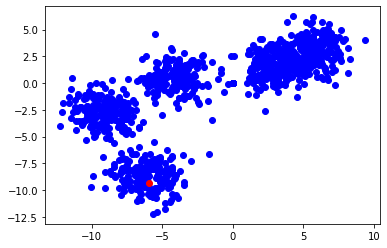

2 итерация


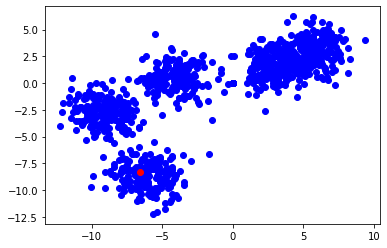

2 итерация


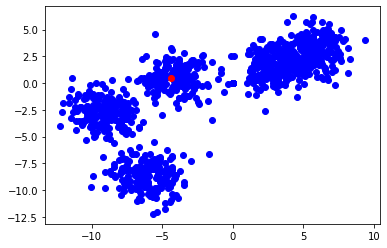

2 итерация


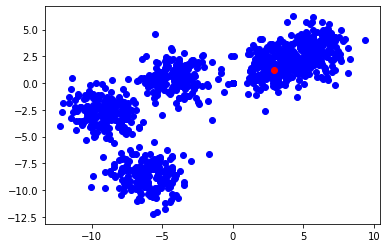

2 итерация


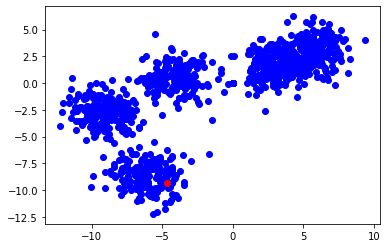

2 итерация


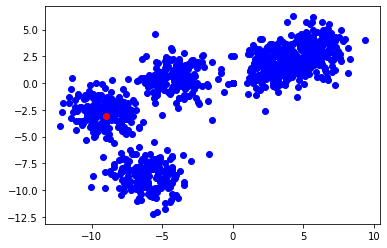

3 итерация


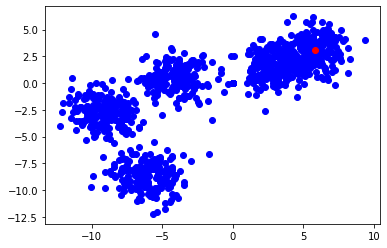

3 итерация


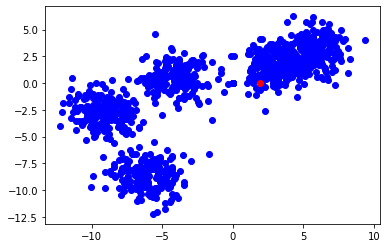

3 итерация


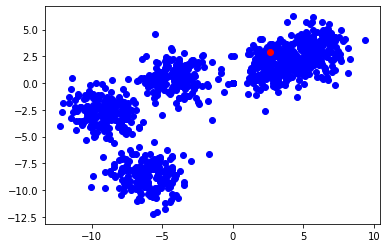

3 итерация


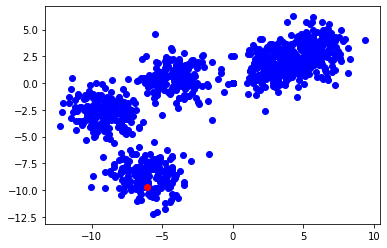

3 итерация


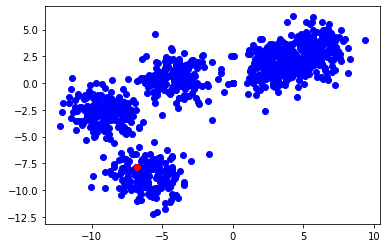

3 итерация


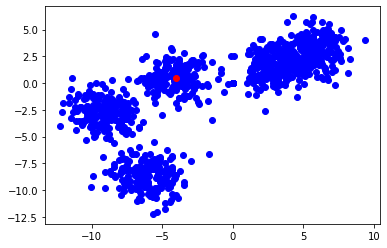

3 итерация


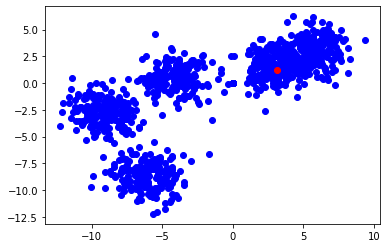

3 итерация


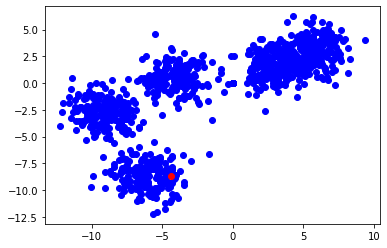

3 итерация


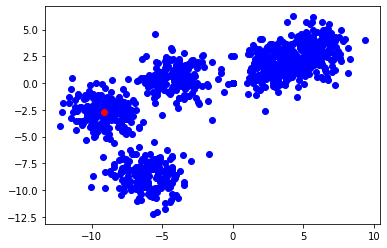

4 итерация


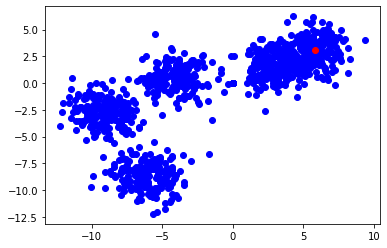

4 итерация


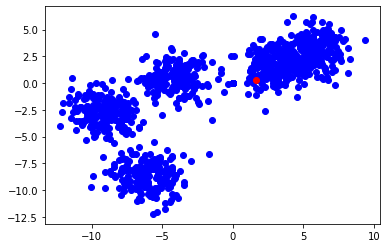

4 итерация


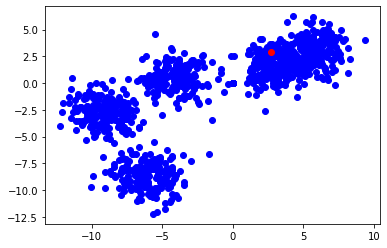

4 итерация


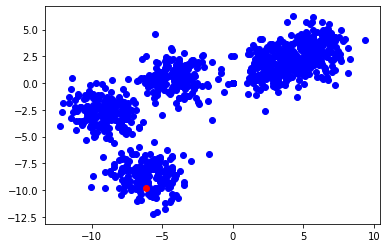

4 итерация


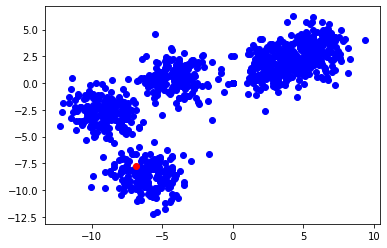

4 итерация


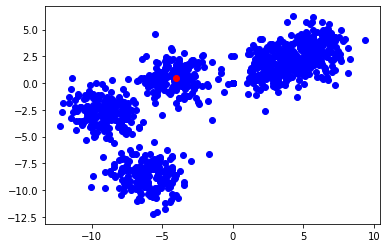

4 итерация


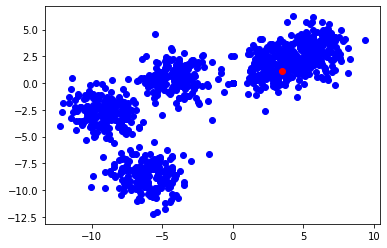

4 итерация


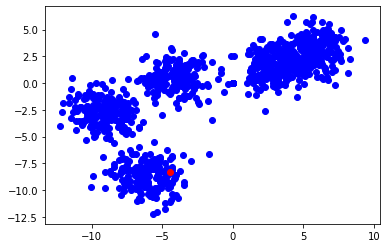

4 итерация


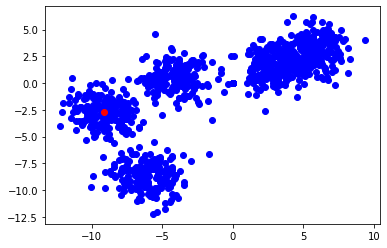

5 итерация


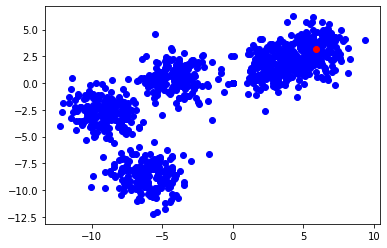

5 итерация


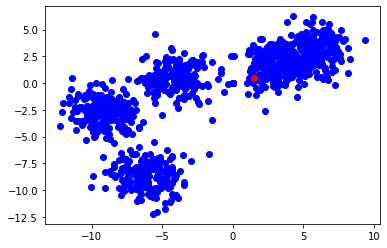

5 итерация


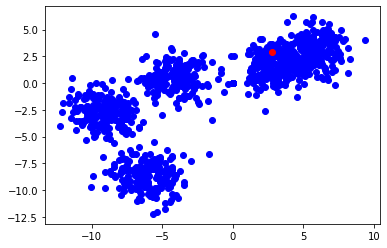

5 итерация


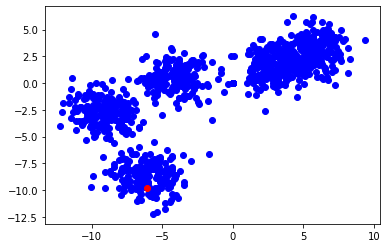

5 итерация


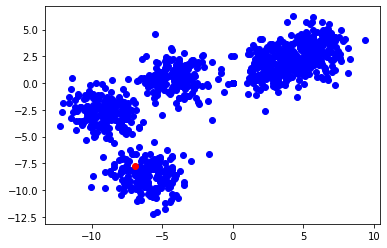

5 итерация


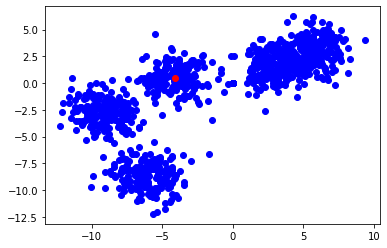

5 итерация


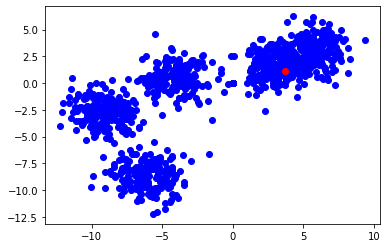

5 итерация


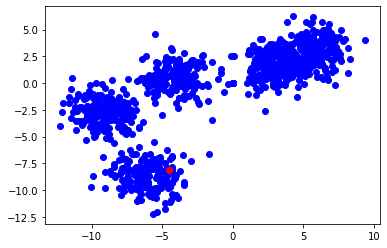

5 итерация


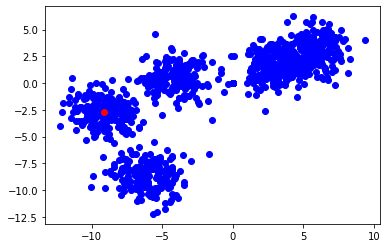

6 итерация


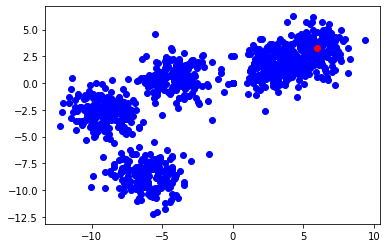

6 итерация


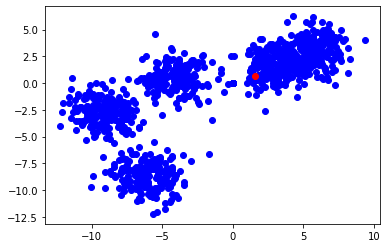

6 итерация


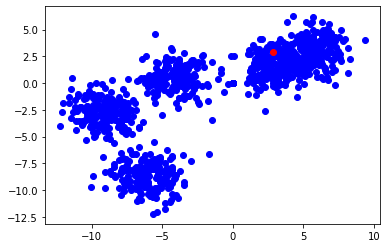

6 итерация


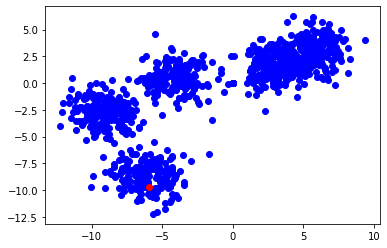

6 итерация


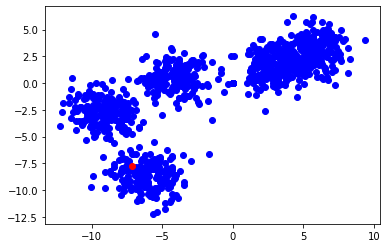

6 итерация


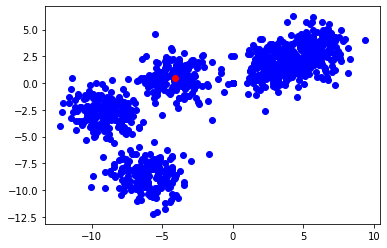

6 итерация


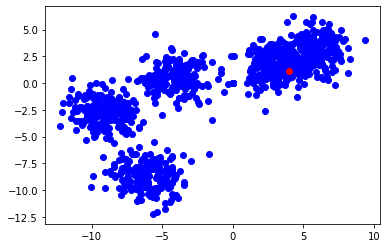

6 итерация


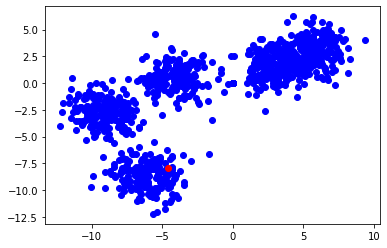

6 итерация


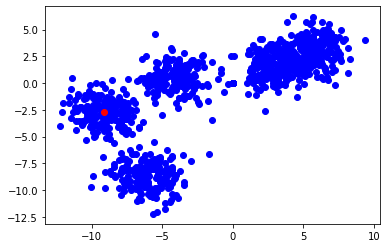

7 итерация


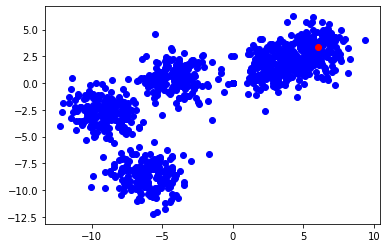

7 итерация


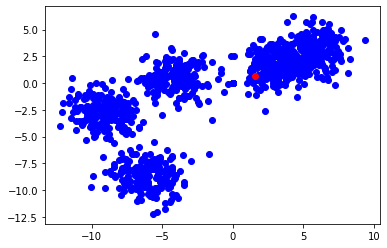

7 итерация


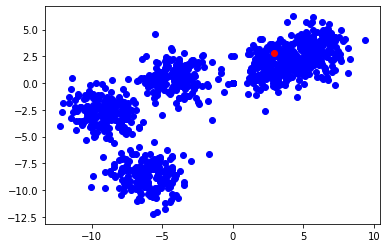

7 итерация


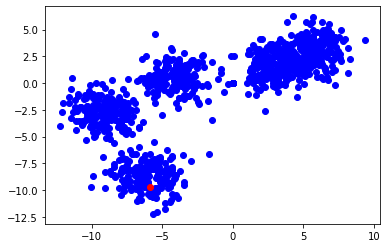

7 итерация


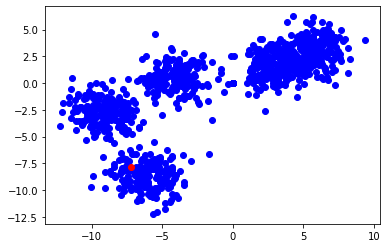

7 итерация


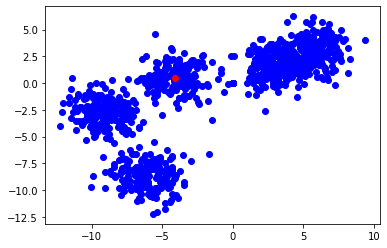

7 итерация


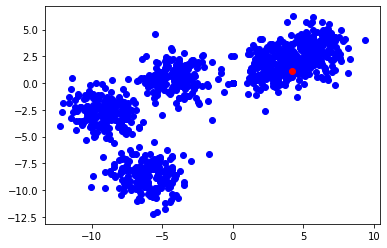

7 итерация


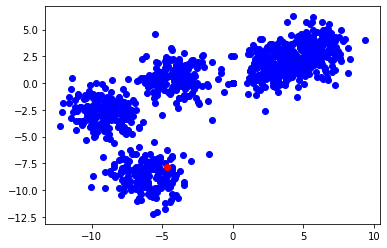

7 итерация


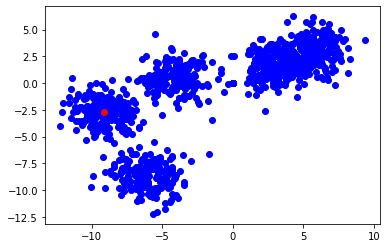

8 итерация


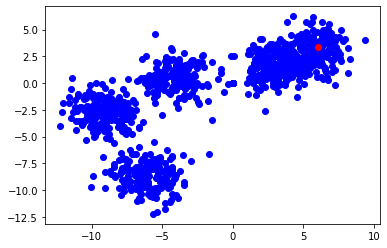

8 итерация


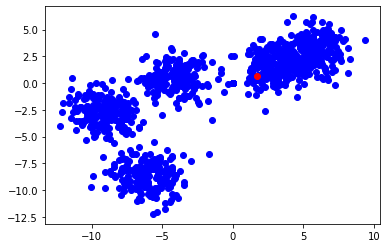

8 итерация


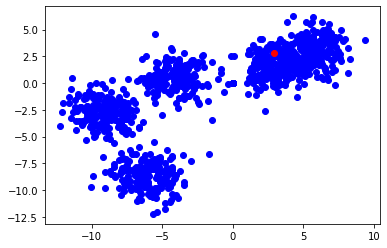

8 итерация


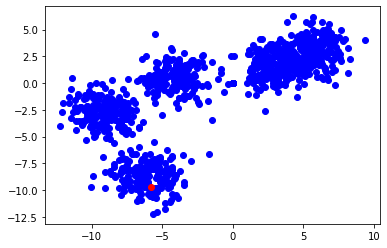

8 итерация


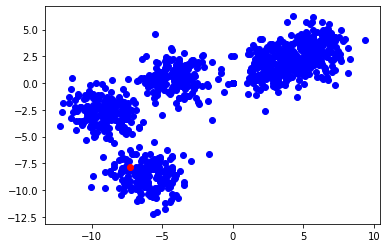

8 итерация


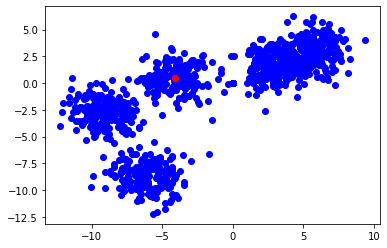

8 итерация


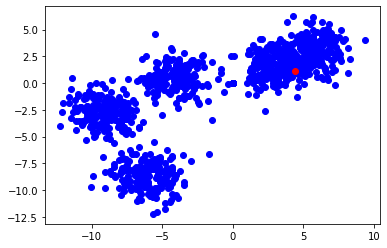

8 итерация


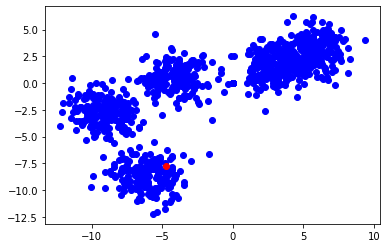

8 итерация


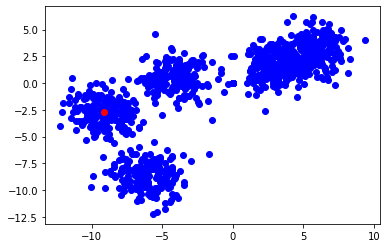

9 итерация


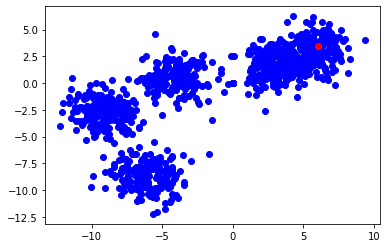

9 итерация


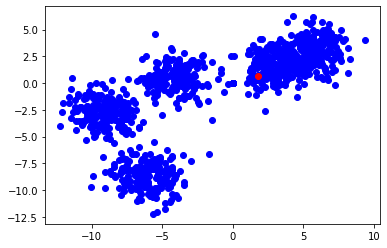

9 итерация


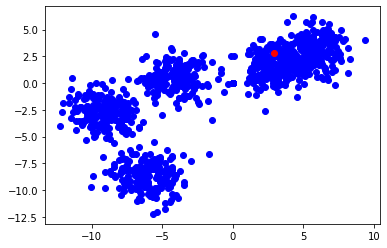

9 итерация


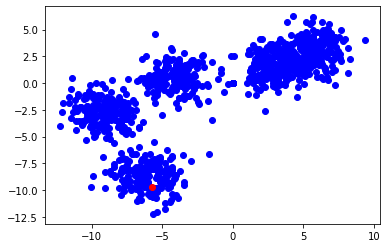

9 итерация


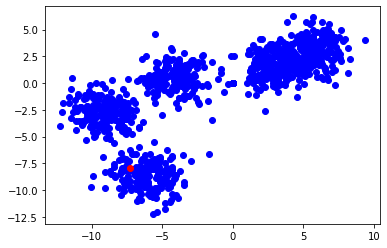

9 итерация


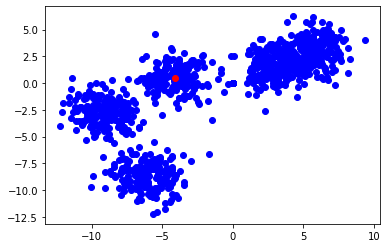

9 итерация


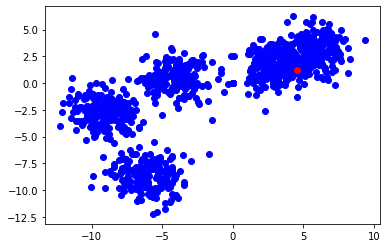

9 итерация


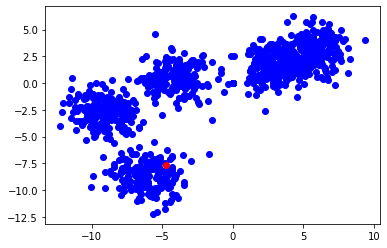

9 итерация


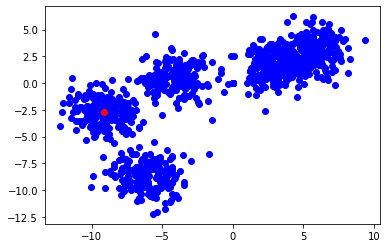

SSE= 10916.089787795503


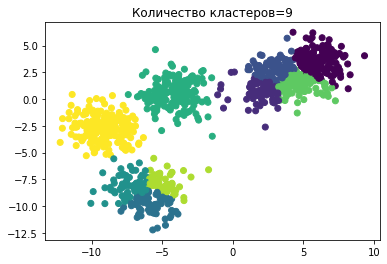

1 итерация


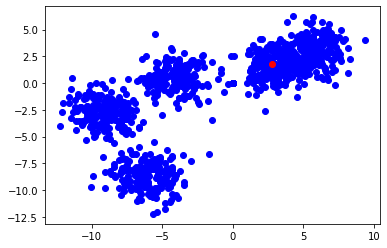

1 итерация


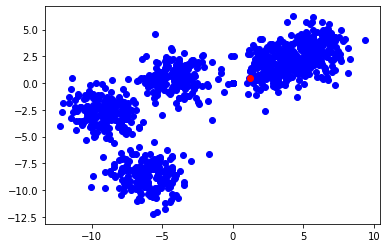

1 итерация


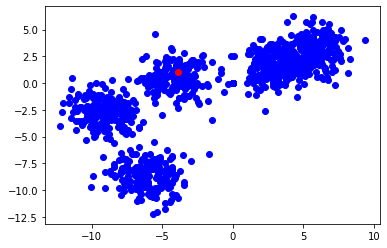

1 итерация


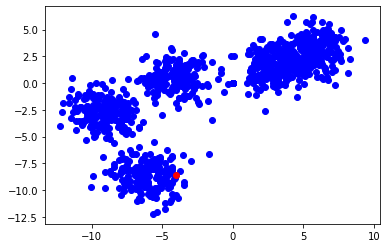

1 итерация


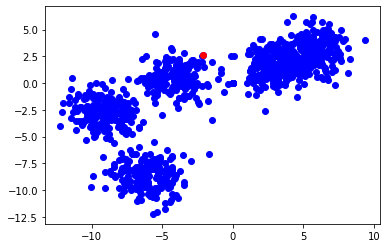

1 итерация


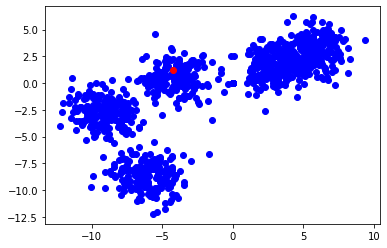

1 итерация


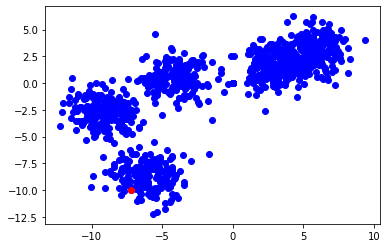

1 итерация


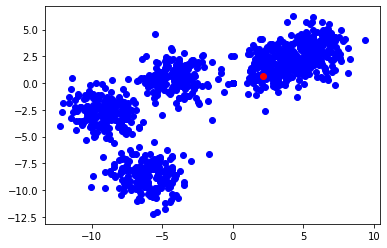

1 итерация


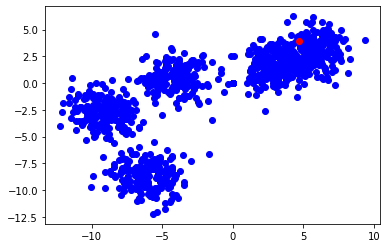

1 итерация


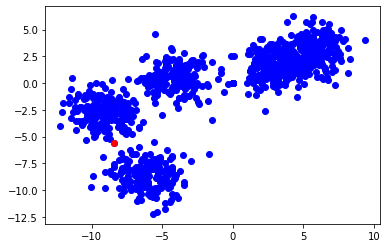

2 итерация


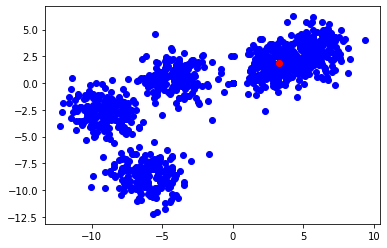

2 итерация


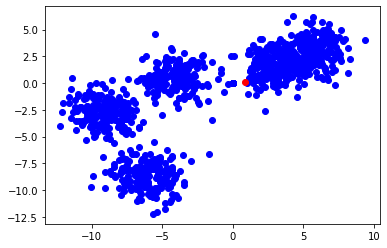

2 итерация


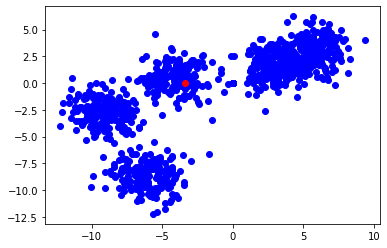

2 итерация


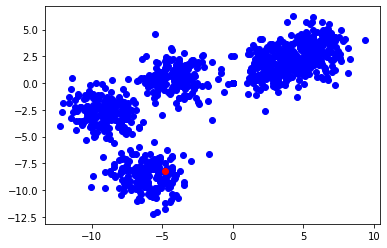

2 итерация


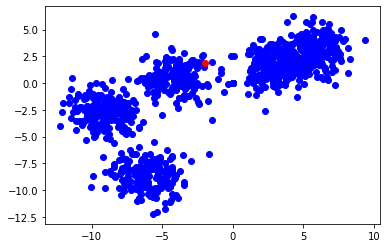

2 итерация


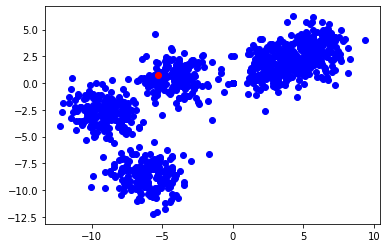

2 итерация


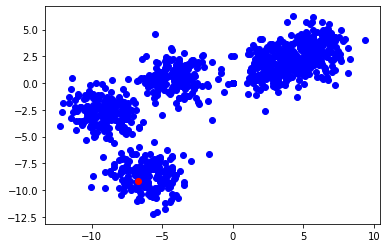

2 итерация


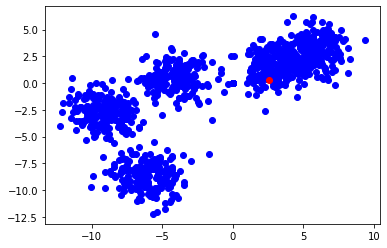

2 итерация


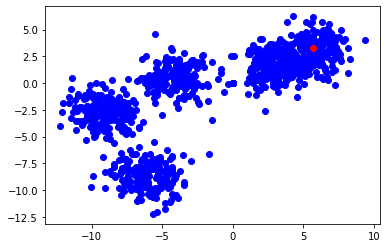

2 итерация


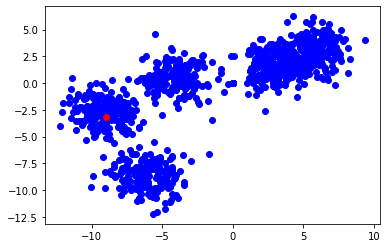

3 итерация


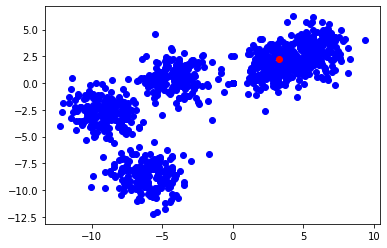

3 итерация


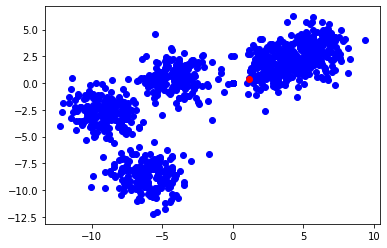

3 итерация


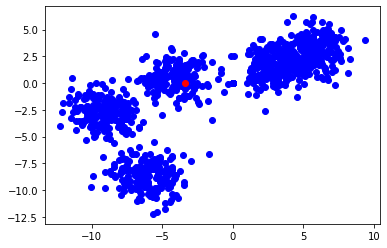

3 итерация


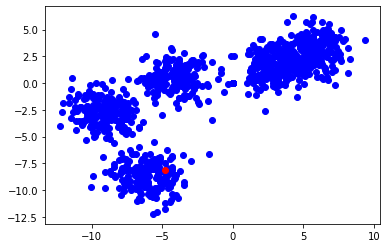

3 итерация


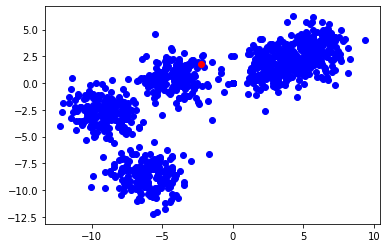

3 итерация


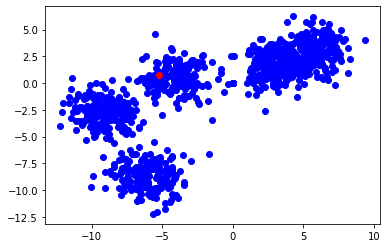

3 итерация


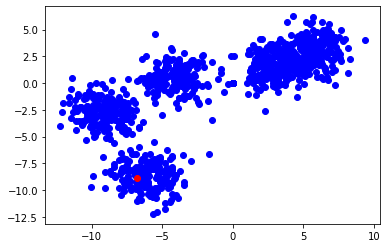

3 итерация


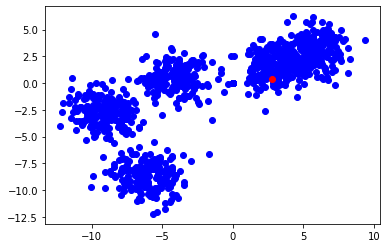

3 итерация


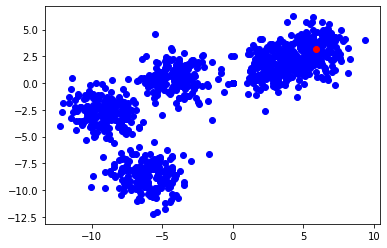

3 итерация


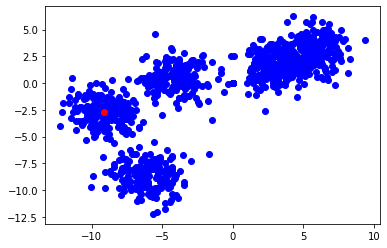

4 итерация


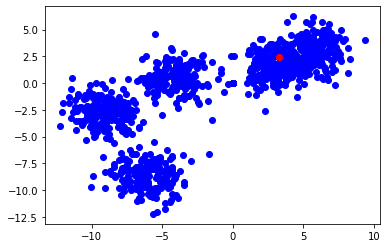

4 итерация


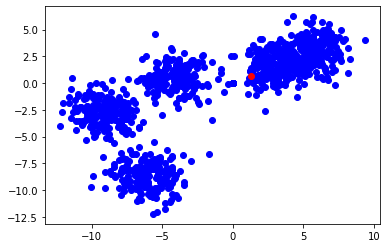

4 итерация


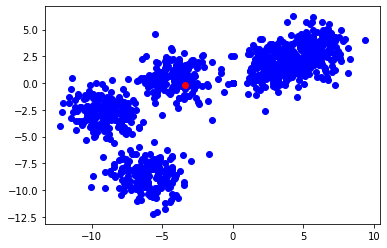

4 итерация


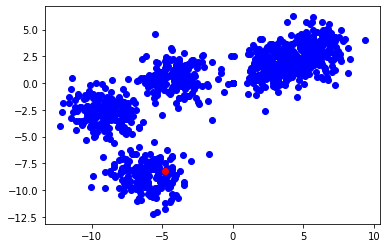

4 итерация


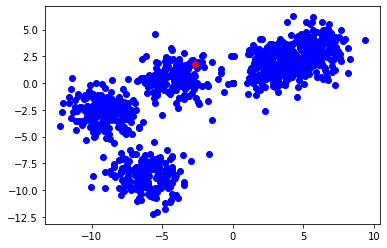

4 итерация


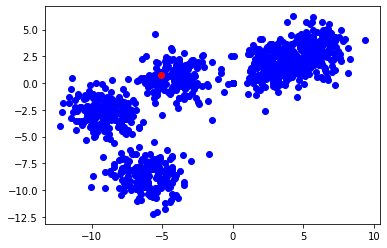

4 итерация


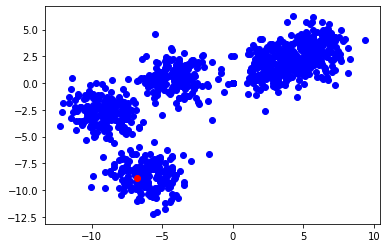

4 итерация


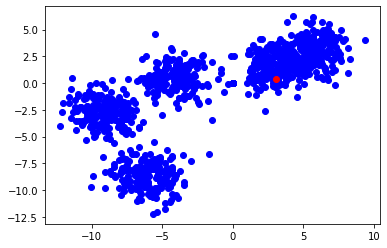

4 итерация


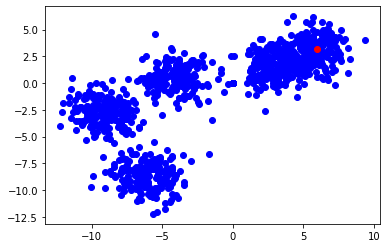

4 итерация


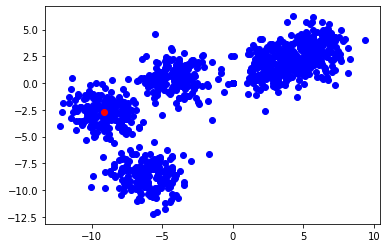

5 итерация


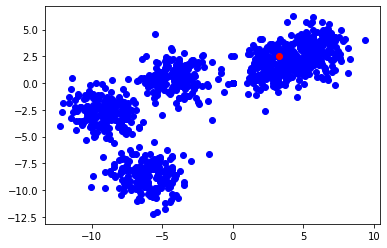

5 итерация


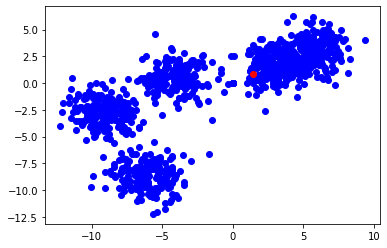

5 итерация


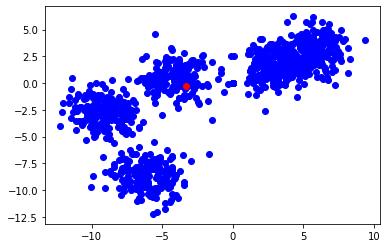

5 итерация


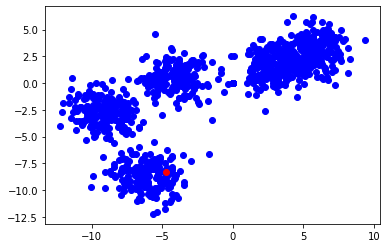

5 итерация


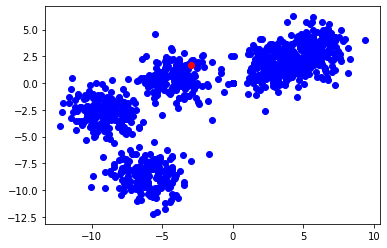

5 итерация


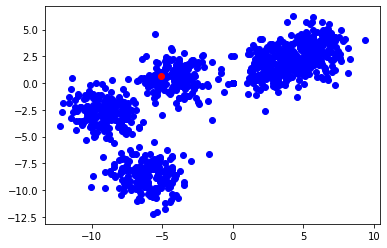

5 итерация


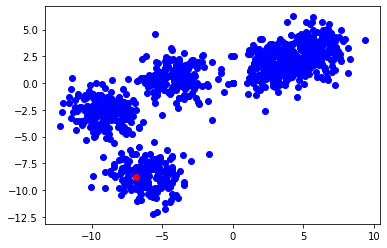

5 итерация


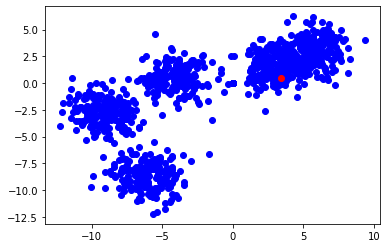

5 итерация


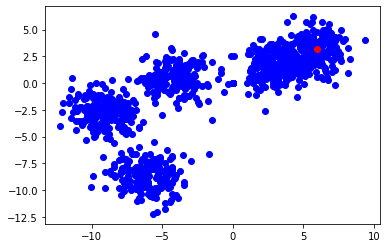

5 итерация


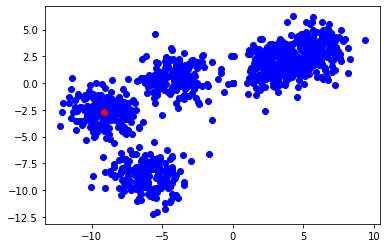

6 итерация


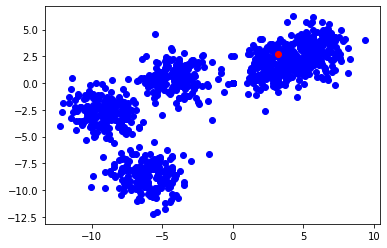

6 итерация


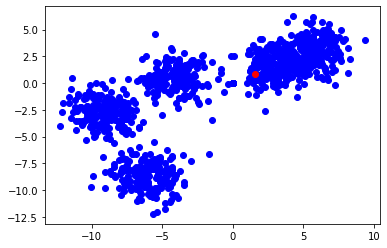

6 итерация


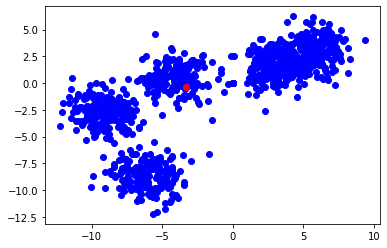

6 итерация


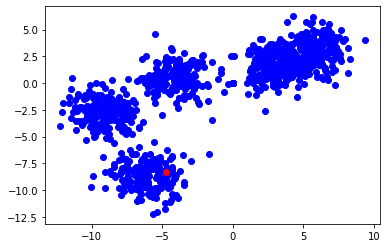

6 итерация


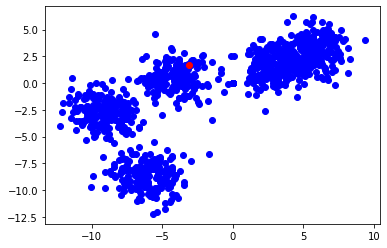

6 итерация


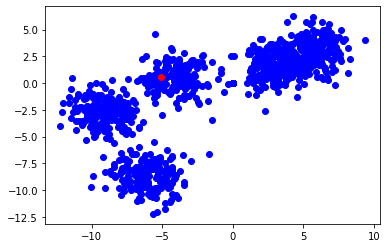

6 итерация


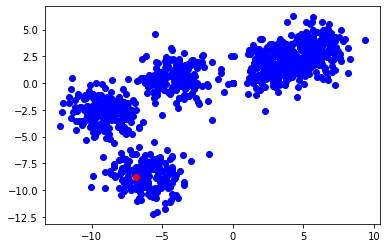

6 итерация


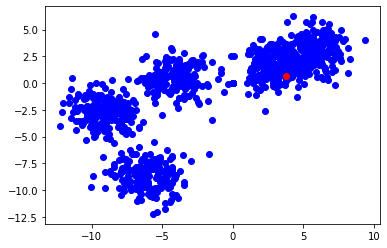

6 итерация


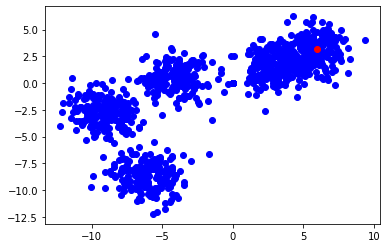

6 итерация


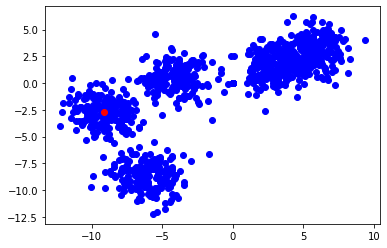

7 итерация


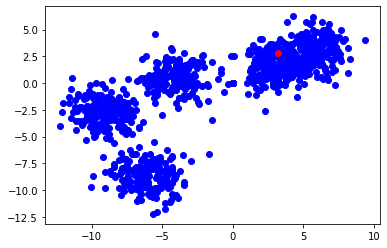

7 итерация


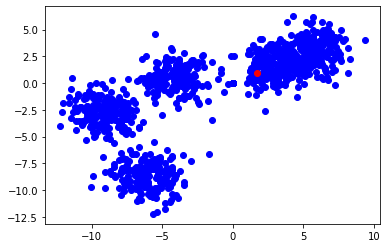

7 итерация


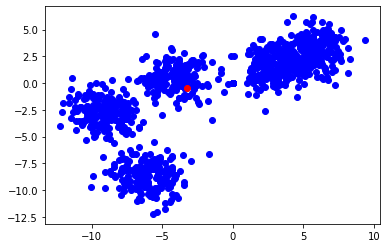

7 итерация


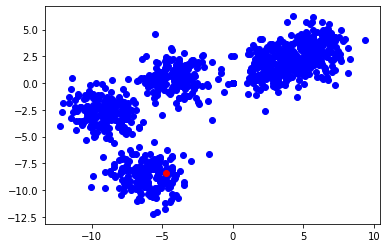

7 итерация


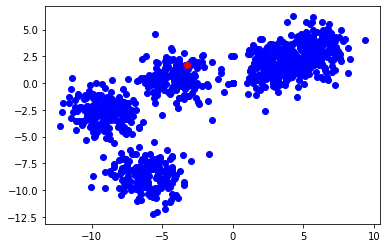

7 итерация


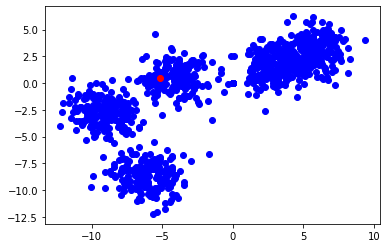

7 итерация


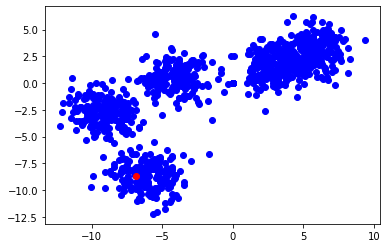

7 итерация


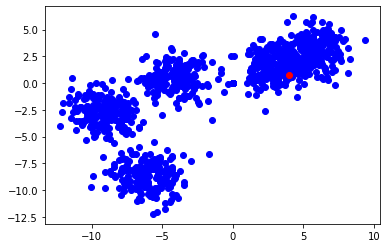

7 итерация


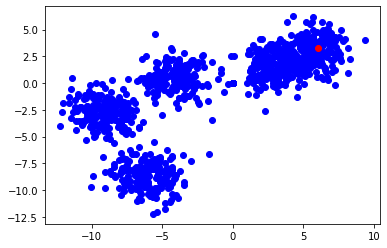

7 итерация


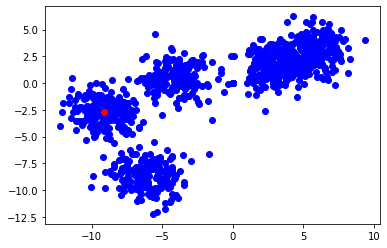

8 итерация


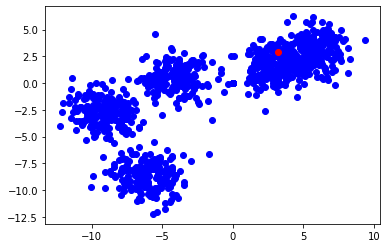

8 итерация


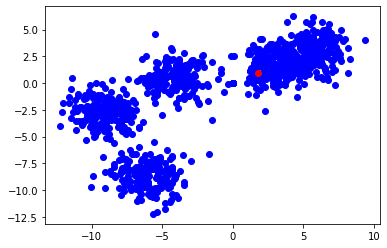

8 итерация


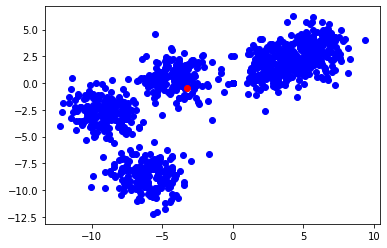

8 итерация


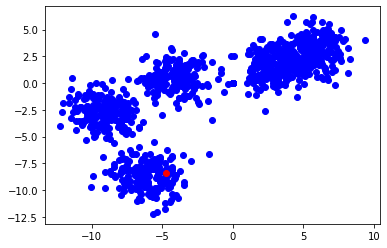

8 итерация


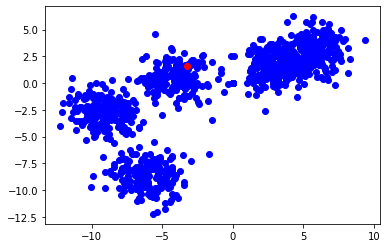

8 итерация


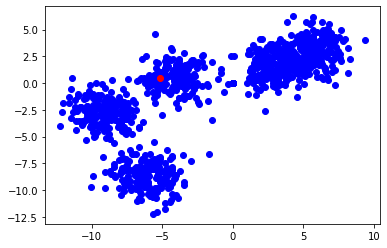

8 итерация


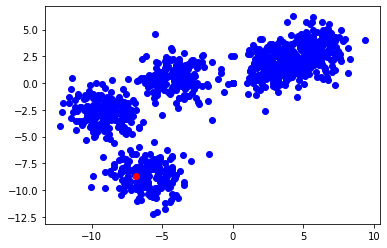

8 итерация


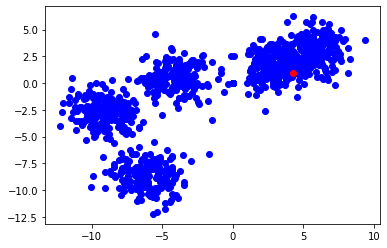

8 итерация


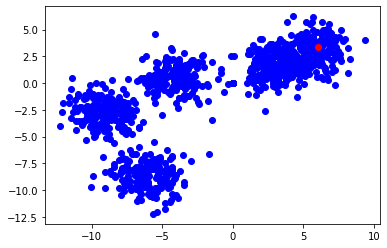

8 итерация


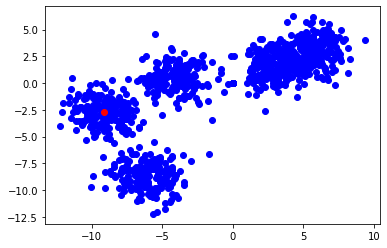

9 итерация


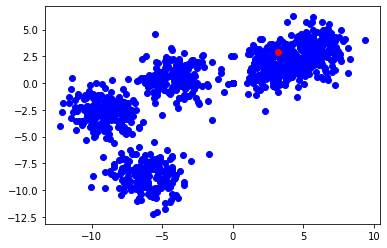

9 итерация


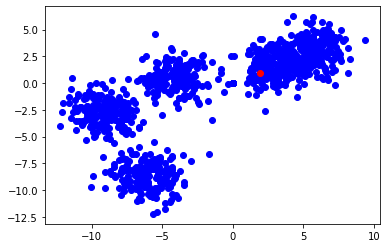

9 итерация


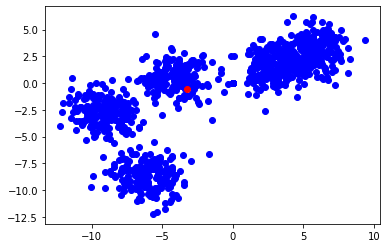

9 итерация


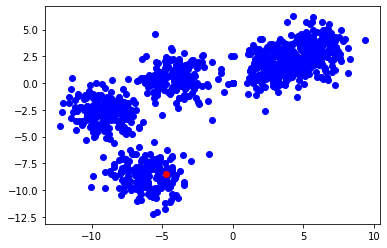

9 итерация


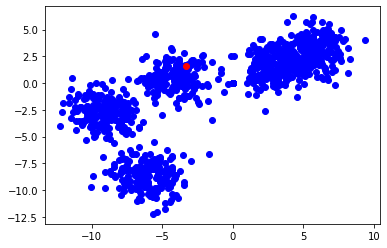

9 итерация


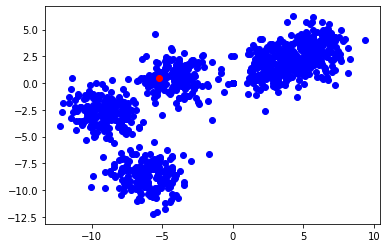

9 итерация


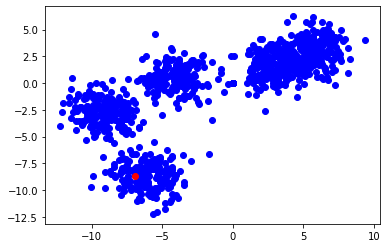

9 итерация


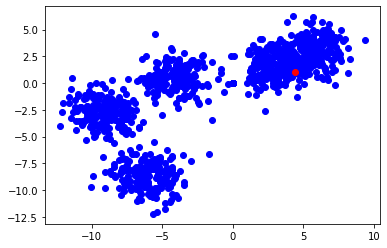

9 итерация


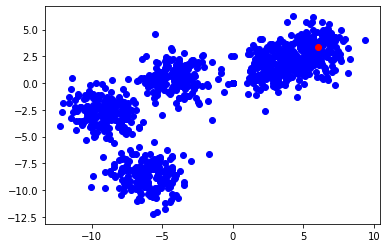

9 итерация


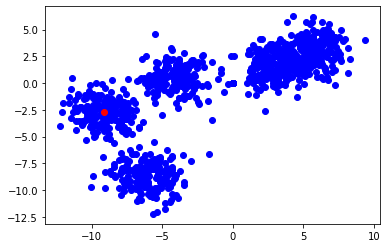

10 итерация


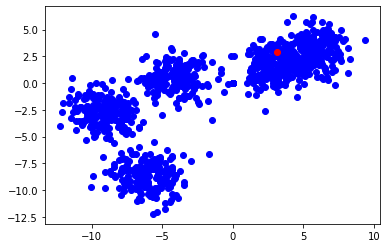

10 итерация


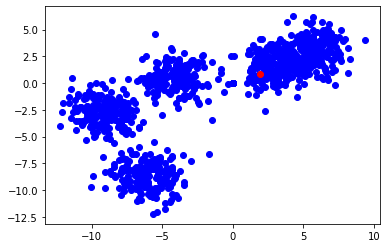

10 итерация


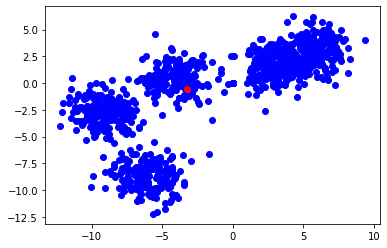

10 итерация


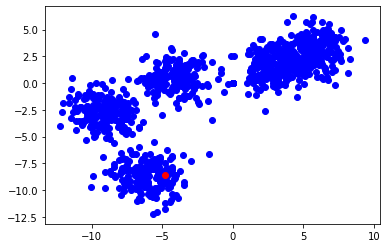

10 итерация


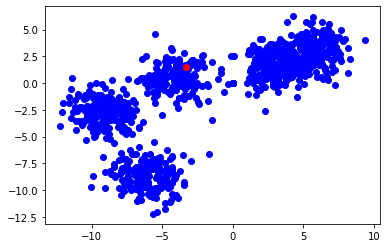

10 итерация


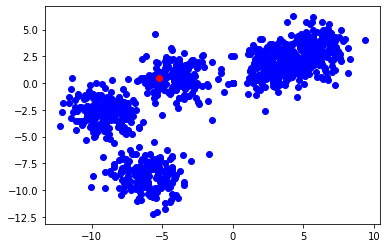

10 итерация


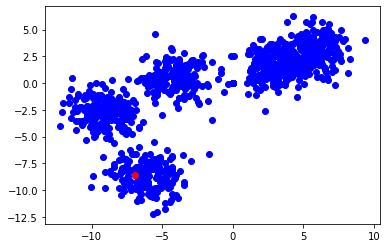

10 итерация


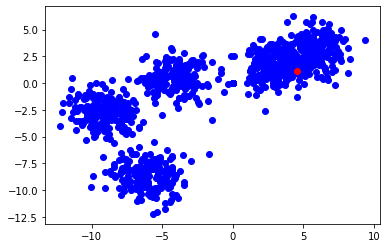

10 итерация


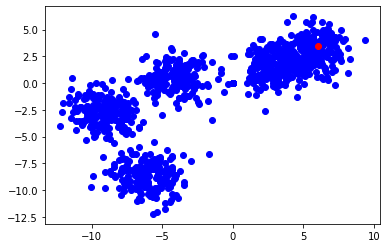

10 итерация


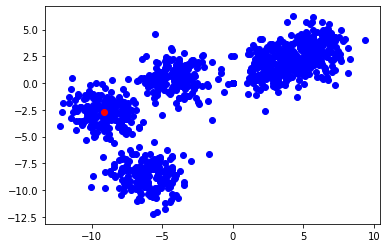

SSE= 9444.270954176971


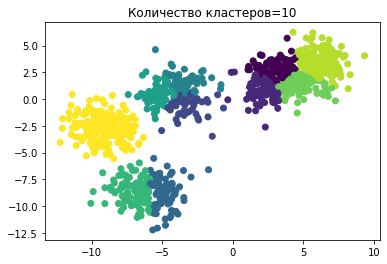

In [18]:
C=[]
K=list(range(1, 11))
#C=km(X,K,E)
plt.figure(figsize=(12,12))
SSE=[]
for kol in K:
  sse, centroids=km(X,kol,0.05)
  SSE.append(sse)
  print("SSE=",sse)
  plt.scatter(X[:, 0] , X[: , 1],c=centroids)
  plt.title('Количество кластеров=%i' %kol)
  plt.show()

Оценка SSE (реализована в коде функции), ниже представлен график зависимости этой оценки от количества кластеров.
$$ SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2 $$

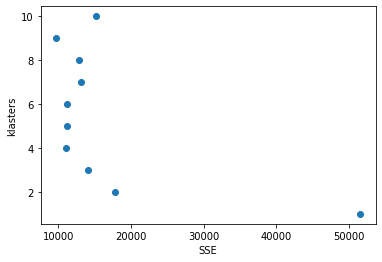

In [531]:
plt.scatter(SSE,K)
plt.xlabel('SSE')
plt.ylabel('klasters')
plt.show()

Задание 2  
Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)  
Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров  
Произведите анализ получившихся кластеров:  
Пример: первый кластер содержит полноприводные автомобили немецкого производства с АКПП, небольшим пробегом и высокой стоимостью, второй - японцы с правым рулём ...

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/MyDrive/2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

Mounted at /content/gdrive


Марка     Год Состояние  ...   Руль  Хозяев в ПТС      Цена
0  Volkswagen  2013.0        БУ  ...  левый    1 владелец  689196.0
1       Skoda  2012.0        БУ  ...  левый    1 владелец  639196.0
2     Renault  2015.0        БУ  ...  левый    1 владелец  629196.0
3      Nissan  2012.0        БУ  ...  левый    1 владелец  479196.0
4         УАЗ  2014.0        БУ  ...  левый    1 владелец  599196.0

[5 rows x 13 columns]

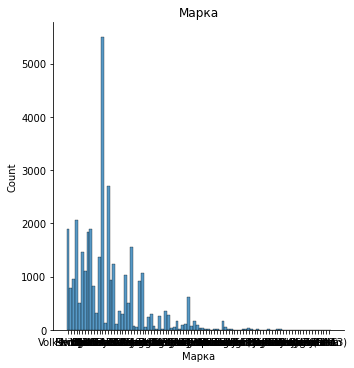

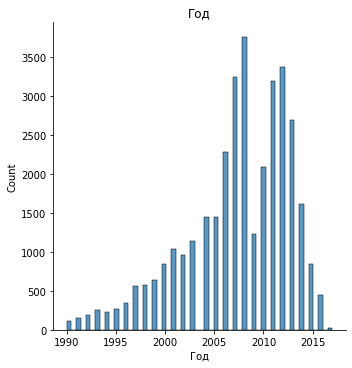

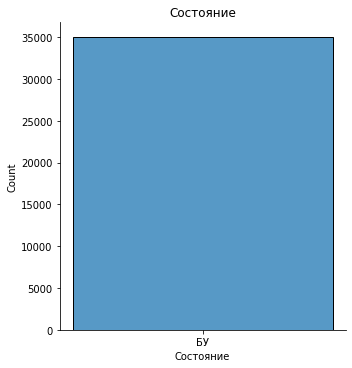

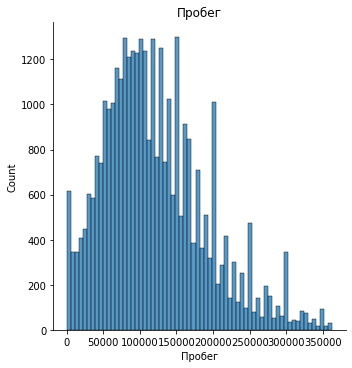

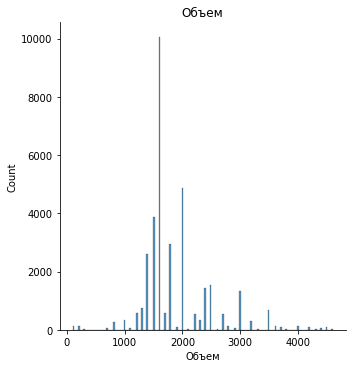

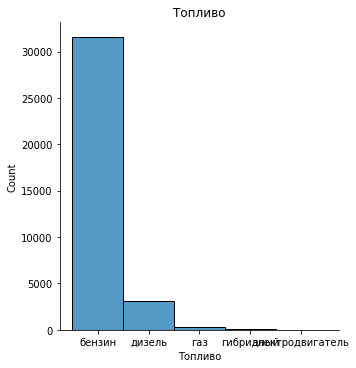

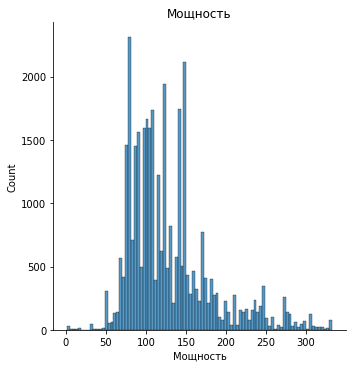

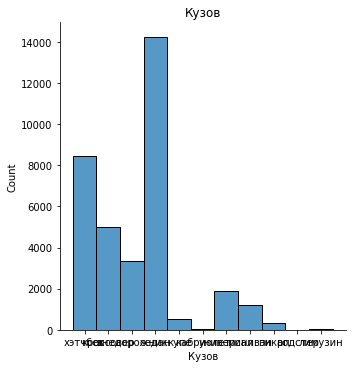

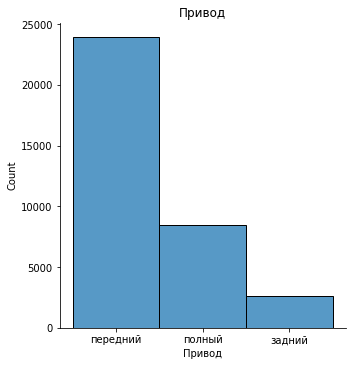

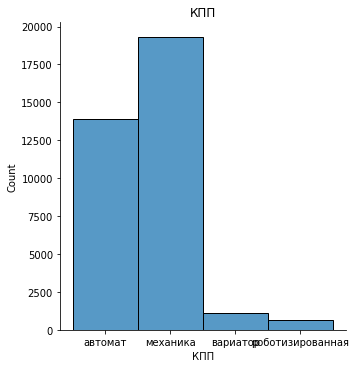

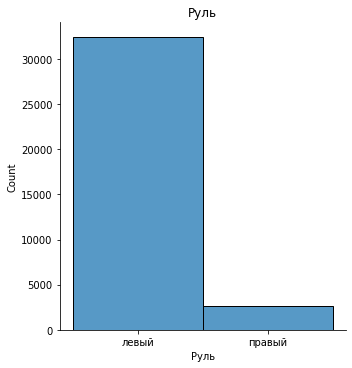

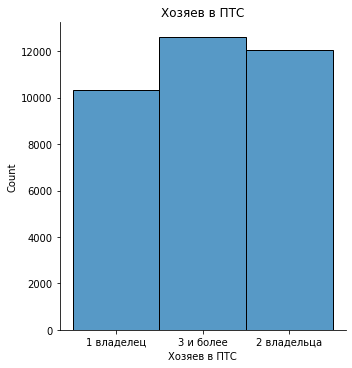

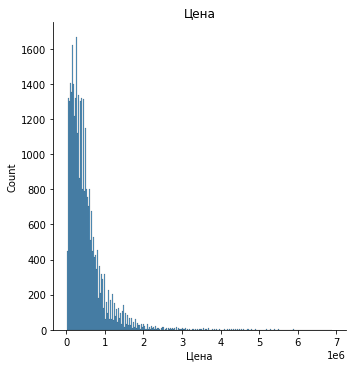

In [4]:
for col in df.columns:
  sns.displot(df[col])
  plt.title(col)

In [5]:
#стандартизация
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 
new_df=df
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']]) 
new_df.head()

Марка       Год Состояние  ...   Руль  Хозяев в ПТС      Цена
0  Volkswagen  1.055883        БУ  ...  левый    1 владелец  0.420103
1       Skoda  0.868335        БУ  ...  левый    1 владелец  0.315187
2     Renault  1.430978        БУ  ...  левый    1 владелец  0.294203
3      Nissan  0.868335        БУ  ...  левый    1 владелец -0.020546
4         УАЗ  1.243431        БУ  ...  левый    1 владелец  0.231254

[5 rows x 13 columns]

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lb=LabelEncoder()
new_df[['Марка','Состояние','Топливо', 'Кузов','Привод','КПП','Руль', 'Хозяев в ПТС']]=new_df[['Марка','Состояние','Топливо', 'Кузов','Привод','КПП','Руль', 'Хозяев в ПТС']].apply(lb.fit_transform)
new_df.head()

Марка       Год  Состояние    Пробег  ...  КПП  Руль  Хозяев в ПТС      Цена
0     77  1.055883          0 -1.129295  ...    0     0             0  0.420103
1     69  0.868335          0 -0.842782  ...    2     0             0  0.315187
2     61  1.430978          0 -1.663641  ...    2     0             0  0.294203
3     54  0.868335          0 -0.728177  ...    0     0             0 -0.020546
4     91  1.243431          0 -1.014690  ...    2     0             0  0.231254

[5 rows x 13 columns]

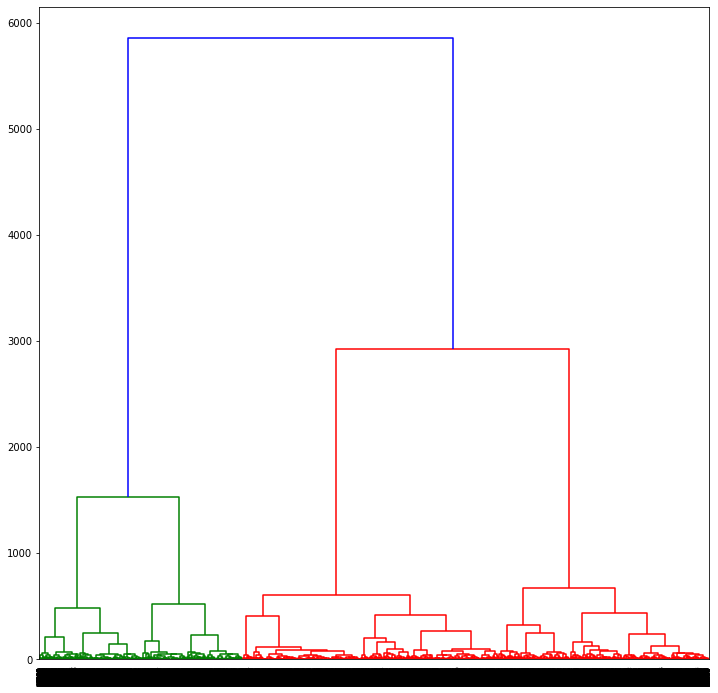

KeyboardInterrupt: ignored

In [23]:
#взяла иерархическую кластеризацию
from scipy.cluster.hierarchy import linkage,dendrogram
K=list(range(1, 11))
X=new_df
plt.figure(figsize=(12,12))
for k in range(K):
  link=linkage(new_df, 'ward', 'euclidean')
  dn=dendrogram(link,leaf_rotation=90,leaf_font_size=6)
  plt.show()

In [28]:
from sklearn.cluster import KMeans
K=list(range(1, 11))
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(new_df)
  clusters = kmeans.fit_predict(new_df)
  print(clusters)
  plt.scatter(new_df[:,0],new_df[:,1],c=clusters)
  plt.show()

[0 0 0 ... 0 0 0]


TypeError: ignored